<img src="images/Peoplelogy-Logo.png" style="height: 100px;" align=left> 

# Capstone Project
#### Designed by:
Uzair Aslam (uzairaslam19@yahoo.com)


## Submission Guideline

- Your jupyter notebook(s) 
- PowerPoint Slides
- Presentation, 12 minutes + 3 minutes Q/A

## The Use Case
#### **This a financial Dataset from a bank in Europe, and consists of 8 CSV files. Descriptions of which are as follows. You are provided a data set (in csv format) containing the following data**


**Account (4500 Observations)** - Each record describes static characteristics of an account

**Client (5369 Observations)** - Each record describes characteristics of a client

**Relationship (disp) (5369 Observations)** - Each record relates together a client with an account (*relationship.csv*)

**Order (6471 Observations)** - Each record describes characteristics of a payment order

**Transaction (1056320 Observations)** - Each record describes one transaction on an account

**Loan (682 Observations)** - Each record describes a loan granted for a given account

**Credit card (892 Observations)** - Each record describes a credit card issued to an account

**Demographic data (77 Observations)** - Each record describes demographic characteristics of a district.

### ER Diagram for the Dataset
<table><tr><td><img src="images/ERDagram.png"></td></tr></table>

## PART 1: SQL

### **CONNECT to the Banking_data.db through jupyter or DB Viewer, and answer the following questions.**
- You are required to provide the answer as well as the query that you wrote 

### **i.Find the average loan amount in the loan table**

In [62]:
#Your Code Here
%load_ext sql
%sql sqlite:///banking_data.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [63]:
%sql select name from sqlite_master where type='table';

   sqlite:///banking.data.db
 * sqlite:///banking_data.db
Done.


name
account
card
client
district
loan
orders
relationship
transactions


In [17]:
%%sql 
SELECT AVG(amount)
FROM loan;

   sqlite:///banking.data.db
 * sqlite:///banking_data.db
Done.


AVG(amount)
151410.1759530792


### **ii. What is the total number of accounts in the account table?**

In [16]:
%%sql 
SELECT SUM(account_id)
FROM account;

   sqlite:///banking.data.db
 * sqlite:///banking_data.db
Done.


SUM(account_id)
12537304


### **iii. Find all clients who have a loan but no credit card.**
#### **Part A: Fetch the list of all clients who have a loan but no credit card.**
#### **Part B: Count the number of clients who meet this condition.**

In [32]:
!pip install tabulate

In [64]:
import sqlite3
import pandas as pd
con = sqlite3.connect('banking_data.db')
c = con.cursor()
c.execute("PRAGMA table_info('banking_data.db')")
rows = c.fetchall()
for row in rows:
    print(row)

In [116]:
c.execute ("SELECT * FROM loan LIMIT 5;")
results = c.fetchall()
results

[(5314, 1787, 930705, 96396, 12, 8033.0, 'B'),
 (5316, 1801, 930711, 165960, 36, 4610.0, 'A'),
 (6863, 9188, 930728, 127080, 60, 2118.0, 'A'),
 (5325, 1843, 930803, 105804, 36, 2939.0, 'A'),
 (7240, 11013, 930906, 274740, 60, 4579.0, 'A')]

In [66]:
c.execute("PRAGMA table_info(loan);")
loan_columns = c.fetchall()
loan_columns

Columns in loan table:
(0, 'loan_id', 'INTEGER', 0, None, 0)
(1, 'account_id', 'INTEGER', 0, None, 0)
(2, 'date', 'INTEGER', 0, None, 0)
(3, 'amount', 'INTEGER', 0, None, 0)
(4, 'duration', 'INTEGER', 0, None, 0)
(5, 'payments', 'REAL', 0, None, 0)
(6, 'status', 'TEXT', 0, None, 0)


In [67]:
c.execute("PRAGMA table_info(account);")
account_columns = c.fetchall()
account_columns

Columns in account table:
(0, 'account_id', 'INTEGER', 0, None, 0)
(1, 'district_id', 'INTEGER', 0, None, 0)
(2, 'frequency', 'TEXT', 0, None, 0)
(3, 'date', 'INTEGER', 0, None, 0)


In [59]:
c.execute("PRAGMA table_info(relationship);")
relationship_columns = c.fetchall()
relationship_columns

Columns in account table:
(0, 'disp_id', 'INTEGER', 0, None, 0)
(1, 'client_id', 'INTEGER', 0, None, 0)
(2, 'account_id', 'INTEGER', 0, None, 0)
(3, 'type', 'TEXT', 0, None, 0)


In [75]:
c.execute("PRAGMA table_info(card);")
card_columns = c.fetchall()
card_columns

Columns in card table:
(0, 'card_id', 'INTEGER', 0, None, 0)
(1, 'disp_id', 'INTEGER', 0, None, 0)
(2, 'type', 'TEXT', 0, None, 0)
(3, 'issued', 'TEXT', 0, None, 0)


In [87]:
# Part A
#Step 1 Those that have loans and have no credit cards
c = con.cursor()

query = """
SELECT loan.loan_id, account.account_id AS account_id_from_account, relationship.account_id AS account_id_from_relationship, relationship.disp_id AS disp_id_from_relationship, card.disp_id AS disp_id_from_card
FROM loan
INNER JOIN account ON loan.account_id = account.account_id 
INNER JOIN relationship ON loan.account_id = relationship.account_id
LEFT JOIN card ON card.disp_id = relationship.disp_id
WHERE card.disp_id IS NULL
"""

df_loan_no_card = pd.read_sql_query(query, con)
df_loan_no_card

,loan_id,account_id_from_account,account_id_from_relationship,disp_id_from_relationship,disp_id_from_card
0,5314,1787,1787,2166,None
1,5316,1801,1801,2181,None
2,6863,9188,9188,11006,None
3,6687,8261,8261,9892,None
4,6687,8261,8261,9893,None
...,...,...,...,...,...
652,6856,9156,9156,10963,None
653,5221,1284,1284,1554,None
654,6402,6922,6922,8356,None
655,5346,1928,1928,2342,None


In [105]:
# Part B
df_unique = df_loan_no_card["account_id_from_account"].unique()
df_unique

array([ 1787,  1801,  9188,  8261, 11265,  5428, 10973, 10364,  5270,
        6034,  6701,  2705,  7123, 10320,  9034,  9236, 10266,     2,
        7401,  2486,  1071,  8475, 11111,  1603,  1166,  8073, 10940,
        5313, 11135,  2694,  7445,  7485,  8330,  6555, 10079,  5385,
       10131,  8321,  5256,   813,  2933,  8173,  9833,  7769,  6473,
        7454,   173,  8051,  4576,  8027,  5927, 11065,  8558,  1811,
        7844,  4260,  3354,  2762,  6051,  5228,   426,  4937, 10911,
        2176,  9403,  9104,  8519, 10788,  8260,  4259, 10105,  3050,
        3674,  5481,  9307,  4427,  3834,  7824,  8566,  7965,  6040,
        4448,  8982,  1012,  5991,   290,  6148,  7133,  1106,  1527,
        1978,  2345, 10451,  6425,  6226,   344,  2962,  3747,  7523,
        6118,   816,  9640,  6715,  2245,  7857,  2419,  7819,  3678,
        6472,  4413,  9750,   817,  4414, 11021,  8564,  9869,  5700,
        1247,  8316,  3064,  7607,  2228,  2361,  3752,  4079,  9591,
        9828,  1993,

In [108]:
num_unique = df_unique.shape[0]
print("Number of unique account IDs with no cards:", num_unique)

Number of unique account IDs with no cards: 548


### **iv. Find the total loan amount issued for each district.**
#### **Part A: Display the total loan amount issued for each district.**
#### **Part B: Count how many districts have a total loan amount greater than a  1,000,000.**

In [110]:
c.execute("PRAGMA table_info(district);")
district_columns = c.fetchall()
district_columns

[(0, 'A1', 'INTEGER', 0, None, 0),
 (1, 'A2', 'TEXT', 0, None, 0),
 (2, 'A3', 'TEXT', 0, None, 0),
 (3, 'A4', 'INTEGER', 0, None, 0),
 (4, 'A5', 'INTEGER', 0, None, 0),
 (5, 'A6', 'INTEGER', 0, None, 0),
 (6, 'A7', 'INTEGER', 0, None, 0),
 (7, 'A8', 'INTEGER', 0, None, 0),
 (8, 'A9', 'INTEGER', 0, None, 0),
 (9, 'A10', 'REAL', 0, None, 0),
 (10, 'A11', 'INTEGER', 0, None, 0),
 (11, 'A12', 'TEXT', 0, None, 0),
 (12, 'A13', 'REAL', 0, None, 0),
 (13, 'A14', 'INTEGER', 0, None, 0),
 (14, 'A15', 'TEXT', 0, None, 0),
 (15, 'A16', 'INTEGER', 0, None, 0)]

In [123]:
c.execute("PRAGMA table_info(account);")
account_columns = c.fetchall()
account_columns

[(0, 'account_id', 'INTEGER', 0, None, 0),
 (1, 'district_id', 'INTEGER', 0, None, 0),
 (2, 'frequency', 'TEXT', 0, None, 0),
 (3, 'date', 'INTEGER', 0, None, 0)]

In [152]:
c.execute("PRAGMA table_info(loan);")
loan_columns = c.fetchall()
loan_columns

[(0, 'loan_id', 'INTEGER', 0, None, 0),
 (1, 'account_id', 'INTEGER', 0, None, 0),
 (2, 'date', 'INTEGER', 0, None, 0),
 (3, 'amount', 'INTEGER', 0, None, 0),
 (4, 'duration', 'INTEGER', 0, None, 0),
 (5, 'payments', 'REAL', 0, None, 0),
 (6, 'status', 'TEXT', 0, None, 0)]

In [186]:
c.execute("PRAGMA table_info(client);")
client_columns = c.fetchall()
client_columns

[(0, 'client_id', 'INTEGER', 0, None, 0),
 (1, 'birth_number', 'INTEGER', 0, None, 0),
 (2, 'district_id', 'INTEGER', 0, None, 0)]

In [130]:
c.execute ("""
SELECT district.A1
FROM district
""")
district_A1= c.fetchall()
district_A1

[(1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (10,),
 (11,),
 (12,),
 (13,),
 (14,),
 (15,),
 (16,),
 (17,),
 (18,),
 (19,),
 (20,),
 (21,),
 (22,),
 (23,),
 (24,),
 (25,),
 (26,),
 (27,),
 (28,),
 (29,),
 (30,),
 (31,),
 (32,),
 (33,),
 (34,),
 (35,),
 (36,),
 (37,),
 (38,),
 (39,),
 (40,),
 (41,),
 (42,),
 (43,),
 (44,),
 (45,),
 (46,),
 (47,),
 (48,),
 (49,),
 (50,),
 (51,),
 (52,),
 (53,),
 (54,),
 (55,),
 (56,),
 (57,),
 (58,),
 (59,),
 (60,),
 (61,),
 (62,),
 (63,),
 (64,),
 (65,),
 (66,),
 (67,),
 (68,),
 (69,),
 (70,),
 (71,),
 (72,),
 (73,),
 (74,),
 (75,),
 (76,),
 (77,)]

In [129]:
c.execute ("""
SELECT account.district_id
FROM account
""")
district_account= c.fetchall()
district_account

[(55,),
 (74,),
 (55,),
 (16,),
 (24,),
 (77,),
 (1,),
 (47,),
 (74,),
 (76,),
 (48,),
 (70,),
 (19,),
 (62,),
 (6,),
 (21,),
 (70,),
 (44,),
 (37,),
 (10,),
 (41,),
 (36,),
 (1,),
 (26,),
 (55,),
 (1,),
 (7,),
 (68,),
 (54,),
 (41,),
 (38,),
 (1,),
 (41,),
 (38,),
 (1,),
 (9,),
 (60,),
 (44,),
 (26,),
 (37,),
 (74,),
 (14,),
 (3,),
 (44,),
 (44,),
 (53,),
 (1,),
 (50,),
 (33,),
 (15,),
 (4,),
 (55,),
 (15,),
 (32,),
 (1,),
 (54,),
 (40,),
 (54,),
 (66,),
 (27,),
 (49,),
 (47,),
 (45,),
 (52,),
 (74,),
 (60,),
 (73,),
 (41,),
 (74,),
 (25,),
 (41,),
 (68,),
 (23,),
 (66,),
 (75,),
 (1,),
 (54,),
 (77,),
 (1,),
 (68,),
 (12,),
 (46,),
 (13,),
 (27,),
 (30,),
 (48,),
 (70,),
 (59,),
 (32,),
 (63,),
 (64,),
 (61,),
 (72,),
 (12,),
 (1,),
 (40,),
 (36,),
 (44,),
 (1,),
 (17,),
 (16,),
 (68,),
 (64,),
 (1,),
 (54,),
 (1,),
 (7,),
 (67,),
 (1,),
 (32,),
 (54,),
 (70,),
 (14,),
 (63,),
 (61,),
 (64,),
 (48,),
 (1,),
 (73,),
 (6,),
 (70,),
 (1,),
 (10,),
 (74,),
 (24,),
 (1,),
 (50,),
 (6,),
 

In [166]:
c.execute ("""
SELECT loan.amount
FROM loan
""")
district_A1= c.fetchall()
district_A1

[(96396,),
 (165960,),
 (127080,),
 (105804,),
 (274740,),
 (87840,),
 (52788,),
 (174744,),
 (154416,),
 (117024,),
 (21924,),
 (79608,),
 (464520,),
 (95400,),
 (93888,),
 (47016,),
 (259740,),
 (38148,),
 (86616,),
 (75624,),
 (80952,),
 (80952,),
 (24516,),
 (253200,),
 (21072,),
 (108144,),
 (78936,),
 (149040,),
 (49320,),
 (197748,),
 (300660,),
 (182628,),
 (91632,),
 (51696,),
 (55368,),
 (91200,),
 (7656,),
 (212400,),
 (167100,),
 (149340,),
 (65184,),
 (215388,),
 (89040,),
 (193968,),
 (24312,),
 (272520,),
 (80340,),
 (97632,),
 (196080,),
 (76908,),
 (63312,),
 (25944,),
 (104808,),
 (208320,),
 (151560,),
 (52128,),
 (300204,),
 (77640,),
 (87216,),
 (87360,),
 (69360,),
 (288360,),
 (174744,),
 (239460,),
 (91584,),
 (244560,),
 (4980,),
 (111384,),
 (276660,),
 (39576,),
 (173808,),
 (50460,),
 (252060,),
 (143904,),
 (208128,),
 (131292,),
 (74736,),
 (299088,),
 (189300,),
 (14628,),
 (120888,),
 (172080,),
 (323472,),
 (74688,),
 (45768,),
 (224604,),
 (79632,),
 (

In [169]:
c.execute ("""
SELECT district.A1, 
       COUNT(account.district_id) AS total_accounts, 
       SUM(loan.amount) AS total_loans
FROM district
INNER JOIN account ON district.A1 = account.district_id
LEFT JOIN loan ON account.account_id = loan.account_id
GROUP BY district.A1
""")
district_loan = c.fetchall()

#Display results
df_district_loan = pd.DataFrame(district_loan, columns=['District', 'Total Accounts', 'Total Loan Amount'])
df_district_loan

,District,Total Accounts,Total Loan Amount
0,1,554,12932412
1,2,42,887952
2,3,50,1460796
3,4,48,1106520
4,5,65,1901160
...,...,...,...
72,73,56,1493076
73,74,135,3260220
74,75,51,695628
75,76,55,829644


In [178]:
#Part B
filtered_df= df_district_loan [df_district_loan ["Total Loan Amount"] > 1000000]
filtered_df

,District,Total Accounts,Total Loan Amount
0,1,554,12932412
2,3,50,1460796
3,4,48,1106520
4,5,65,1901160
5,6,48,2095980
8,9,46,1005084
10,11,48,1233096
11,12,42,1299192
13,14,41,2010924
15,16,52,1339572


In [185]:
num_districts = filtered_df.shape[0]
print(f"Number of Districts with Total Loan more than a Million: {num_districts}")

Number of Districts with Total Loan more than a Million: 40


#### **v. Fetch the top 5 clients with the highest loan payments.**


In [231]:
# Your Code Here
#Top 5 clients with highest loan payments
c = con.cursor()

query = """
SELECT client.district_id, 
       loan.account_id, 
       loan.payments
FROM client
INNER JOIN account ON account.district_id = client.district_id
INNER JOIN loan ON account.account_id = loan.account_id
GROUP BY loan.account_id
"""

df_client_loan = pd.read_sql_query(query, con)
df_client_loan 

,district_id,account_id,payments
0,1,2,3373.0
1,21,19,2523.0
2,68,25,2523.0
3,20,37,5308.0
4,19,38,2307.0
...,...,...,...
677,7,11327,1632.0
678,54,11328,4674.0
679,1,11349,6998.0
680,61,11359,4502.0


In [232]:
df_client_loan.sort_values(by='payments', ascending=False).head(5)

,district_id,account_id,payments
402,36,6950,9910.0
429,54,7542,9847.0
564,21,9494,9736.0
150,6,2516,9721.0
276,72,4794,9698.0


#### **vi. List the districts where more than 100 accounts have been opened.**

In [206]:
# Your Code Here
#Group by Districts with more than 100 accounts
df_district_loan

,District,Total Accounts,Total Loan Amount
0,1,554,12932412
1,2,42,887952
2,3,50,1460796
3,4,48,1106520
4,5,65,1901160
...,...,...,...
72,73,56,1493076
73,74,135,3260220
74,75,51,695628
75,76,55,829644


In [226]:
filtered_df2= df_district_loan [df_district_loan ["Total Accounts"] >= 100]
filtered_df2

,District,Total Accounts,Total Loan Amount
0,1,554,12932412
53,54,128,4049400
69,70,152,3059820
73,74,135,3260220


In [228]:
district_ids = filtered_df2['District'].tolist()
district_ids

[1, 54, 70, 74]

In [229]:
print(f"Districts {district_ids} have more than 100 accounts.")

Districts [1, 54, 70, 74] have more than 100 accounts.


#### **vii. Count of all transactions where the transaction amount is above the average transaction amount for that account.**

In [277]:
c.execute ("""
SELECT *
FROM transactions
LIMIT 5
""")
transactions= c.fetchall()
transactions

[(695247, 2378, 930101, 'PRIJEM', 'VKLAD', 700.0, 700.0, None, None, None),
 (171812, 576, 930101, 'PRIJEM', 'VKLAD', 900.0, 900.0, None, None, None),
 (207264, 704, 930101, 'PRIJEM', 'VKLAD', 1000.0, 1000.0, None, None, None),
 (1117247, 3818, 930101, 'PRIJEM', 'VKLAD', 600.0, 600.0, None, None, None),
 (579373, 1972, 930102, 'PRIJEM', 'VKLAD', 400.0, 400.0, None, None, None)]

In [303]:
query = """
SELECT transactions.account_id,
       transactions.type,
       SUM(transactions.amount) AS total_amount,
       AVG(transactions.amount) AS average_amount
FROM transactions
WHERE (transactions.type LIKE '%VYBER%' OR transactions.type LIKE '%VYBER KARTOU%')
GROUP BY transactions.account_id, transactions.type
HAVING SUM (transactions.amount) > (
    SELECT AVG(amount)
    FROM transactions
    WHERE (transactions.type LIKE '%VYBER%' OR transactions.type LIKE '%VYBER KARTOU%')
);
"""
df_higher_withdrawal = pd.read_sql_query(query, con)
df_higher_withdrawal

,account_id,type,total_amount,average_amount
0,2,VYBER,217442.0,10354.380952
1,17,VYBER,20507.0,10253.500000
2,18,VYBER,456620.0,11415.500000
3,19,VYBER,32194.0,10731.333333
4,25,VYBER,85758.0,10719.750000
...,...,...,...,...
1112,11328,VYBER,97155.0,10795.000000
1113,11333,VYBER,401063.0,13829.758621
1114,11349,VYBER,229379.0,11468.950000
1115,11359,VYBER,29529.0,9843.000000


In [304]:
#Double check all accounts column is unique
df_higher_withdrawal['account_id'].unique().shape

(1117,)

#### **viii. Find the total loan amount per district.**
#### **Part A: Display the total loan amount issued per district.**
#### **Part B: Count the number of districts where the total loan amount is above 500,000.**



In [235]:
# Part A
# Your Code Here
filtered_df= df_district_loan [df_district_loan ["Total Loan Amount"] > 500000]
filtered_df

,District,Total Accounts,Total Loan Amount
0,1,554,12932412
1,2,42,887952
2,3,50,1460796
3,4,48,1106520
4,5,65,1901160
...,...,...,...
71,72,88,2287596
72,73,56,1493076
73,74,135,3260220
74,75,51,695628


In [237]:
# Part B
# Your Code Here
num_districts = filtered_df.shape[0]
print(f"Number of Districts with Total Loan more than a 500,000: {num_districts}")

Number of Districts with Total Loan more than a 500,000: 65


### **ix. Find all clients who own multiple accounts.**

In [305]:
#Your code here
df_client_loan 

,district_id,account_id,payments
0,1,2,3373.0
1,21,19,2523.0
2,68,25,2523.0
3,20,37,5308.0
4,19,38,2307.0
...,...,...,...
677,7,11327,1632.0
678,54,11328,4674.0
679,1,11349,6998.0
680,61,11359,4502.0


In [309]:
df_client_loan[df_client_loan['account_id'] > 1]

,district_id,account_id,payments
0,1,2,3373.0
1,21,19,2523.0
2,68,25,2523.0
3,20,37,5308.0
4,19,38,2307.0
...,...,...,...
677,7,11327,1632.0
678,54,11328,4674.0
679,1,11349,6998.0
680,61,11359,4502.0


#### **x. List all credit card types available in the system.**

In [314]:
#Your code here
c.execute ("""
SELECT type, COUNT(*) AS count
FROM card
GROUP BY type;
""")
results = c.fetchall()
results

[('classic', 659), ('gold', 88), ('junior', 145)]

## PART 2. PYTHON - Conduct exploratory data analysis to answer the following questions:

**Hint:**
- Use Pandas to solve these questions (not mandatory but preferable).
- This part also requires you to plot where necessary.
- You can load the data to Pandas Dataframes directly from the DB with the code as below
```
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite Database
db_path = 'path_to_your_database.db'  # Replace with the actual path to your database
conn = sqlite3.connect(db_path)

# Step 2: Load Data from Database Tables into Pandas DataFrames
# Example: Loading the 'client' table
client_df = pd.read_sql_query("SELECT * FROM client", conn)


# Step 3: Close the database connection after loading the data
conn.close()
```

**Incase you get DB error, then please feel free to directly load the csv files provided. Please Note that you have to load all the csv files, as you need all of them to answer the questions below.**

### a. Clients
#### i. Which Districts have the highest number of customers? Try to visualize your Answer using seaborn

	Hints:

	1.	Hint 1:
You need to join the client table with the account table using the common column account_id. After that, you can group by district_id to count how many customers are in each district.
	•	Tip: Use pd.merge() to combine the DataFrames and groupby() to aggregate the data.
	
	2.	Hint 2:
To visualize, you can use a bar plot with district_id on the x-axis and the count of customers on the y-axis. Seaborn’s barplot() is ideal for this.
	•	Tip: Use Seaborn’s sns.barplot() function for the visualization.

In [326]:
#Your Code Here
#Districts with the highest number of customers
#client & distirct, district & account, groupby district

query= ("""
SELECT client.district_id,
        COUNT(DISTINCT account.account_id) AS total_unique_accounts
FROM client
INNER JOIN account ON account.district_id = client.district_id
GROUP BY client.district_id;
""")

#Display results
df_highest_customer = pd.read_sql_query(query, con)
df_highest_customer 

,district_id,total_unique_accounts
0,1,554
1,2,42
2,3,50
3,4,48
4,5,65
...,...,...
72,73,56
73,74,135
74,75,51
75,76,55


Text(0.5, 1.0, 'Distirct with most Customers')

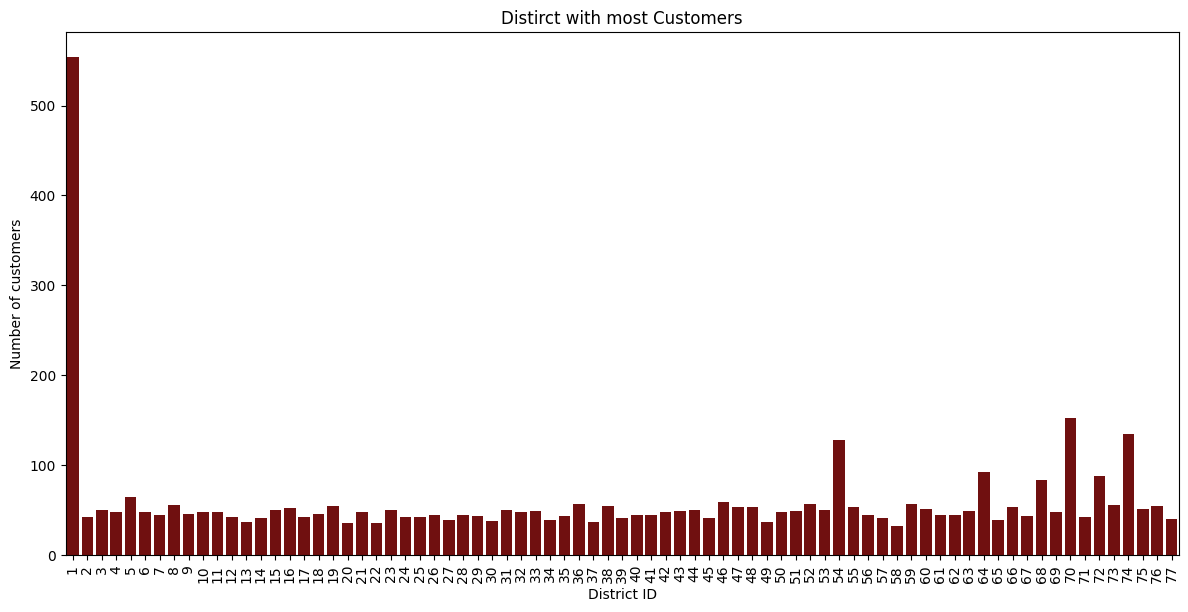

In [343]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="district_id", y="total_unique_accounts", data=df_highest_customer, color="maroon", width = 0.8)
ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.title 
plt.xlabel("District ID")
plt.ylabel("Number of customers")
plt.title("Distirct with most Customers")

#### ii. Which district have shown a significant decline in the monthly number of accounts opened?

	Hints:

	1.	Hint 1:
Start by extracting the month and year from the date column in the account table. Then group by district_id and month/year to calculate the number of accounts opened per district each month.

	•	Tip: Use pd.to_datetime() to convert the date and .dt.to_period('M') to extract the year and month.

	2.	Hint 2:
To detect a significant decline, calculate the percentage change in the number of accounts opened for each district month-over-month. Focus on identifying districts with large negative changes.

	•	Tip: Use groupby() and pct_change() to find the percentage change in account openings.


In [904]:
#group account_id, date, district A1. 

query = '''
SELECT account.district_id,
       COUNT(account.account_id) AS total_accounts,
       account.date
FROM account
GROUP BY account.district_id, account.date
ORDER BY account.district_id, account.date;
'''

#Display results
df_accounts_district_month = pd.read_sql_query(query, con)
df_accounts_district_month

,district_id,total_accounts,date
0,1,1,930103
1,1,2,930108
2,1,1,930109
3,1,1,930110
4,1,1,930114
...,...,...,...
4319,77,1,970220
4320,77,1,970527
4321,77,1,970629
4322,77,1,970713


In [905]:
#Covert to date time format
df_accounts_district_month['date'] = pd.to_datetime(df_accounts_district_month['date'], format='%y%m%d')
df_accounts_district_month

,district_id,total_accounts,date
0,1,1,1993-01-03
1,1,2,1993-01-08
2,1,1,1993-01-09
3,1,1,1993-01-10
4,1,1,1993-01-14
...,...,...,...
4319,77,1,1997-02-20
4320,77,1,1997-05-27
4321,77,1,1997-06-29
4322,77,1,1997-07-13


In [907]:
# Extract month and year
df_accounts_district_month['month'] = df_accounts_district_month['date'].dt.month
df_accounts_district_month['year'] = df_accounts_district_month['date'].dt.year

# Display the DataFrame
df_accounts_district_month

,district_id,total_accounts,date,month,year
0,1,1,1993-01-03,1,1993
1,1,2,1993-01-08,1,1993
2,1,1,1993-01-09,1,1993
3,1,1,1993-01-10,1,1993
4,1,1,1993-01-14,1,1993
...,...,...,...,...,...
4319,77,1,1997-02-20,2,1997
4320,77,1,1997-05-27,5,1997
4321,77,1,1997-06-29,6,1997
4322,77,1,1997-07-13,7,1997


In [ ]:
import seaborn as sns

df_highest_customer.sns.plot

In [909]:
df_accounts_district_month.sort_values(by=['district_id', 'month'])

,district_id,total_accounts,date,month,year
0,1,1,1993-01-03,1,1993
1,1,2,1993-01-08,1,1993
2,1,1,1993-01-09,1,1993
3,1,1,1993-01-10,1,1993
4,1,1,1993-01-14,1,1993
...,...,...,...,...,...
4297,77,1,1994-11-13,11,1994
4303,77,1,1995-11-08,11,1995
4315,77,1,1996-11-01,11,1996
4316,77,1,1996-12-10,12,1996


In [912]:
monthly_accounts = df_accounts_district_month.groupby(['district_id', 'year', 'month'])['total_accounts'].sum().reset_index()
monthly_accounts 

,district_id,year,month,total_accounts
0,1,1993,1,10
1,1,1993,2,17
2,1,1993,3,14
3,1,1993,4,7
4,1,1993,5,11
...,...,...,...,...
2545,77,1997,2,2
2546,77,1997,5,1
2547,77,1997,6,1
2548,77,1997,7,1


In [424]:
df_accounts_district_month['pct_change'] = df_accounts_district_month.groupby('district_id')['total_accounts'].pct_change()
df_accounts_district_month.groupby('district_id')
df_accounts_district_month

,district_id,total_accounts,date,monthly_period,pct_change
0,1,1,1970-01-01 00:00:00.000930103,1970-01,NaN
1,1,2,1970-01-01 00:00:00.000930108,1970-01,1.0
2,1,1,1970-01-01 00:00:00.000930109,1970-01,-0.5
3,1,1,1970-01-01 00:00:00.000930110,1970-01,0.0
4,1,1,1970-01-01 00:00:00.000930114,1970-01,0.0
...,...,...,...,...,...
4319,77,1,1970-01-01 00:00:00.000970220,1970-01,0.0
4320,77,1,1970-01-01 00:00:00.000970527,1970-01,0.0
4321,77,1,1970-01-01 00:00:00.000970629,1970-01,0.0
4322,77,1,1970-01-01 00:00:00.000970713,1970-01,0.0


In [914]:
monthly_accounts['percentage_change'] = monthly_accounts.groupby('district_id')['total_accounts'].pct_change() * 100
monthly_accounts

,district_id,year,month,total_accounts,percentage_change
0,1,1993,1,10,NaN
1,1,1993,2,17,70.000000
2,1,1993,3,14,-17.647059
3,1,1993,4,7,-50.000000
4,1,1993,5,11,57.142857
...,...,...,...,...,...
2545,77,1997,2,2,0.000000
2546,77,1997,5,1,-50.000000
2547,77,1997,6,1,0.000000
2548,77,1997,7,1,0.000000


Text(0.5, 1.0, 'Yearly Percentage Change in Total Accounts by District')

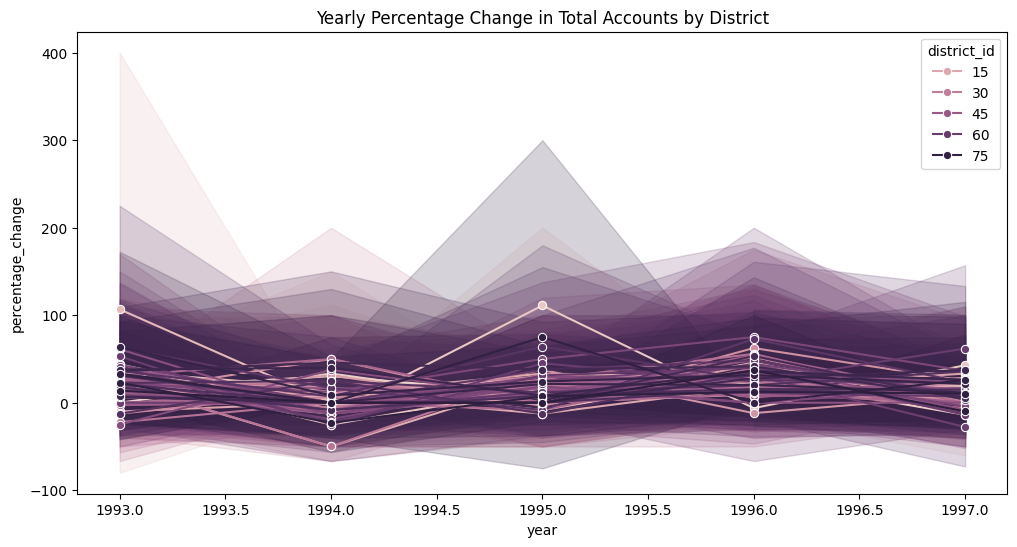

In [918]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_accounts, 
             x='year', 
             y='percentage_change', 
             hue='district_id', 
             marker='o')
plt.title('Yearly Percentage Change in Total Accounts by District')

Text(0, 0.5, 'Percentage Change (%)')

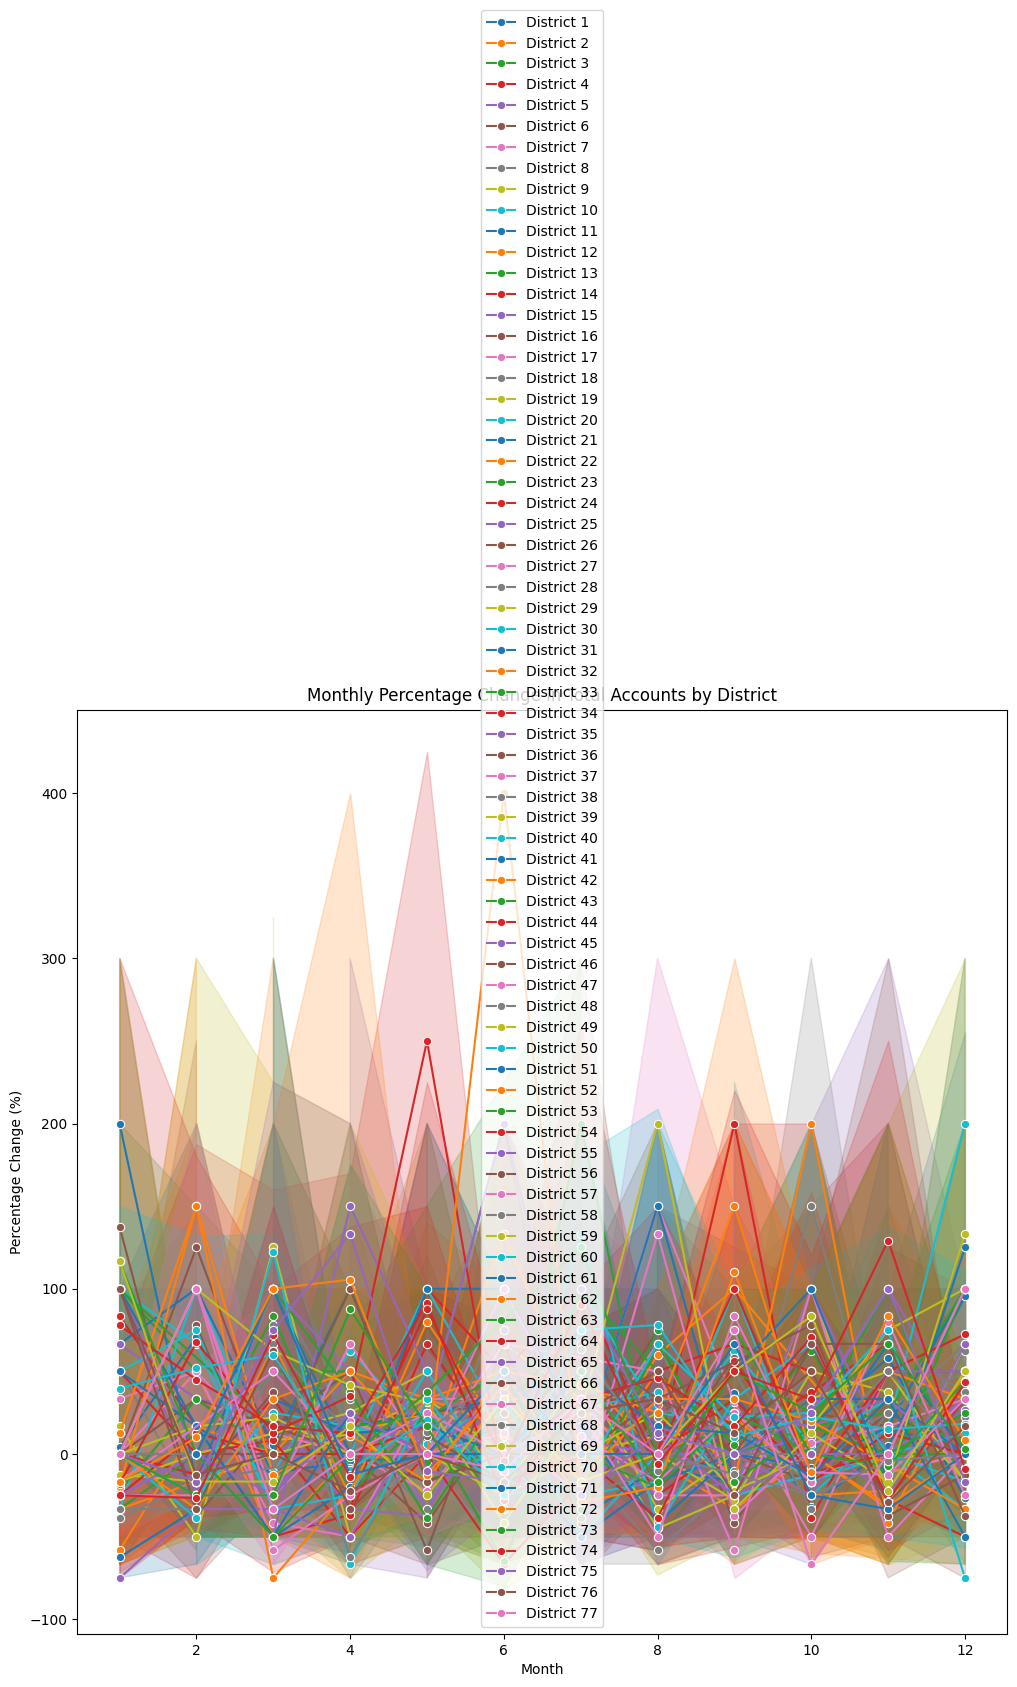

In [921]:
plt.figure(figsize=(12, 12))
for district in monthly_accounts['district_id'].unique():
    district_data = monthly_accounts[monthly_accounts['district_id'] == district]
    sns.lineplot(data=district_data,
                 x='month', 
                 y='percentage_change', 
                 label=f'District {district}', 
                 marker='o')

plt.title('Monthly Percentage Change in Total Accounts by District')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')

#### iii. How many of our clients are men/women?

	Hints:

	•	Females have +50 added to their Month in Date of birth,so whereas a normal month will be 01-12, 
		females may have 51-62
	•	Its better to create a new column Named Gender.
	•	Try to utilize .str[] method and extract the Month part of the date. 


In [441]:
c.execute("PRAGMA table_info(client);")
client_columns = c.fetchall()
client_columns

[(0, 'client_id', 'INTEGER', 0, None, 0),
 (1, 'birth_number', 'INTEGER', 0, None, 0),
 (2, 'district_id', 'INTEGER', 0, None, 0)]

In [616]:
#Your Code Here
query = """
SELECT *
FROM client
"""

#Display results
df_birthnumber = pd.read_sql_query(query, con)
df_birthnumber

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [617]:
df_birthnumber['month'] = df_birthnumber['birth_number'].astype(str).str[2:4]  
df_birthnumber

,client_id,birth_number,district_id,month
0,1,706213,18,62
1,2,450204,1,02
2,3,406009,1,60
3,4,561201,5,12
4,5,605703,5,57
...,...,...,...,...
5364,13955,456030,1,60
5365,13956,430406,1,04
5366,13968,680413,61,04
5367,13971,626019,67,60


In [618]:
df_birthnumber['month'] = df_birthnumber['month'].astype(int)

def gender(month):
    if month > 50:
        return 'Female'
    else: 
        return 'Male'
df_birthnumber['gender'] = df_birthnumber ['month'].apply(gender)

df_birthnumber

,client_id,birth_number,district_id,month,gender
0,1,706213,18,62,Female
1,2,450204,1,2,Male
2,3,406009,1,60,Female
3,4,561201,5,12,Male
4,5,605703,5,57,Female
...,...,...,...,...,...
5364,13955,456030,1,60,Female
5365,13956,430406,1,4,Male
5366,13968,680413,61,4,Male
5367,13971,626019,67,60,Female


In [619]:
df_birthnumber.groupby ('gender').count()

,client_id,birth_number,district_id,month
gender,,,,
Female,2645,2645,2645,2645
Male,2724,2724,2724,2724


#### iv. In the client DataFrame, check if the birthdate column is in the correct format (YYYY-MM-DD). If not, convert it to the correct datetime format.

	•	Hint: Use pd.to_datetime() to ensure the column is in datetime format.
	•	Females have +50 added to their Month in Date of birth. You may need to handle this beforehand

In [620]:
df_birthnumber

,client_id,birth_number,district_id,month,gender
0,1,706213,18,62,Female
1,2,450204,1,2,Male
2,3,406009,1,60,Female
3,4,561201,5,12,Male
4,5,605703,5,57,Female
...,...,...,...,...,...
5364,13955,456030,1,60,Female
5365,13956,430406,1,4,Male
5366,13968,680413,61,4,Male
5367,13971,626019,67,60,Female


In [621]:
df_birthnumber['birth_number'] = df_birthnumber['birth_number'].astype(str)

In [622]:
df_birthnumber_formatted = pd.DataFrame({
    'birth_number': df_birthnumber['birth_number'],
    'gender': df_birthnumber['gender'],
    'district_id': df_birthnumber['district_id'],
    'client_id': df_birthnumber['client_id']
})

df_birthnumber_formatted ['formatted_date'] = pd.to_datetime(
    dict(
        year=df_birthnumber['birth_number'].str[:2].astype(int).apply(lambda x: x + (1900 if x > 30 else 2000)),
        month=df_birthnumber['birth_number'].str[2:4].astype(int).apply(lambda x: x - 50 if x > 20 else x), 
        day=df_birthnumber['birth_number'].str[4:6].astype(int)
    )
)
df_birthnumber_formatted

,birth_number,gender,district_id,client_id,formatted_date
0,706213,Female,18,1,1970-12-13
1,450204,Male,1,2,1945-02-04
2,406009,Female,1,3,1940-10-09
3,561201,Male,5,4,1956-12-01
4,605703,Female,5,5,1960-07-03
...,...,...,...,...,...
5364,456030,Female,1,13955,1945-10-30
5365,430406,Male,1,13956,1943-04-06
5366,680413,Male,61,13968,1968-04-13
5367,626019,Female,67,13971,1962-10-19


####  v. Calculate the age of each client and add it as a new column in the client_df DataFrame. Use the birth_number column to determine the birth year, month, and day. Then, calculate the age based on the current year.
    •   	Hints:
	•	The birth_number field is in the format YYMMDD, where:
	•	YY is the last two digits of the year.
	•	MM is the month of birth (note: for women, 50 is added to the month).
	•	DD is the day of birth.
	
	•	Steps:
	1.	Extract the year, month, and day from the birth_number column.
	2.	Handle cases where MM is greater than 50 (i.e., for women).
	3.	Convert the extracted birth date into a datetime object.
	4.	Subtract the birth year from the current year to calculate age.


In [623]:
df_birthnumber_formatted

,birth_number,gender,district_id,client_id,formatted_date
0,706213,Female,18,1,1970-12-13
1,450204,Male,1,2,1945-02-04
2,406009,Female,1,3,1940-10-09
3,561201,Male,5,4,1956-12-01
4,605703,Female,5,5,1960-07-03
...,...,...,...,...,...
5364,456030,Female,1,13955,1945-10-30
5365,430406,Male,1,13956,1943-04-06
5366,680413,Male,61,13968,1968-04-13
5367,626019,Female,67,13971,1962-10-19


In [624]:
#Calculate the age as of today
today = pd.to_datetime('now')
df_birthnumber_formatted['age'] = (today - df_birthnumber_formatted['formatted_date']).dt.days // 365

df_birthnumber_formatted

,birth_number,gender,district_id,client_id,formatted_date,age
0,706213,Female,18,1,1970-12-13,54
1,450204,Male,1,2,1945-02-04,79
2,406009,Female,1,3,1940-10-09,84
3,561201,Male,5,4,1956-12-01,68
4,605703,Female,5,5,1960-07-03,64
...,...,...,...,...,...,...
5364,456030,Female,1,13955,1945-10-30,79
5365,430406,Male,1,13956,1943-04-06,81
5366,680413,Male,61,13968,1968-04-13,56
5367,626019,Female,67,13971,1962-10-19,62


### b. Credit Cards


#### i. Which card types are popular among the various client categories (gender/age group/region)?
      Hints:
- You can read the query in pandas and plot for ease

In [632]:
query = ("""
SELECT *
FROM card;
""")

#Display results
df_card = pd.read_sql_query(query, con)
df_card

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00
...,...,...,...,...
887,125,694,gold,981226 00:00:00
888,674,4360,classic,981228 00:00:00
889,322,2063,classic,981228 00:00:00
890,685,4467,classic,981229 00:00:00


In [625]:
#Tables to use, client(use above), district id, card type, district table
query = ("""
SELECT *
FROM relationship;
""")

#Display results
df_client = pd.read_sql_query(query, con)
df_client

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


In [626]:
#Your Code Here
query = """
SELECT A1, A3
FROM district
GROUP BY A1;
"""

#Display results
df_region = pd.read_sql_query(query, con)
df_region

,A1,A3
0,1,Prague
1,2,central Bohemia
2,3,central Bohemia
3,4,central Bohemia
4,5,central Bohemia
...,...,...
72,73,north Moravia
73,74,north Moravia
74,75,north Moravia
75,76,north Moravia


In [627]:
df_client = pd.DataFrame(df_client)

print('After merging:')
df_client.set_index('client_id', inplace=True)
df_birthnumber_formatted.set_index('client_id', inplace=True)
df_client = df_client.join(df_birthnumber_formatted, lsuffix='_left', rsuffix='_right', how='outer').reset_index()
df_client

After merging:


,client_id,disp_id,account_id,type,birth_number,gender,district_id,formatted_date,age
0,1,1,1,OWNER,706213,Female,18,1970-12-13,54
1,2,2,2,OWNER,450204,Male,1,1945-02-04,79
2,3,3,2,DISPONENT,406009,Female,1,1940-10-09,84
3,4,4,3,OWNER,561201,Male,5,1956-12-01,68
4,5,5,3,DISPONENT,605703,Female,5,1960-07-03,64
...,...,...,...,...,...,...,...,...,...
5364,13955,13647,11349,OWNER,456030,Female,1,1945-10-30,79
5365,13956,13648,11349,DISPONENT,430406,Male,1,1943-04-06,81
5366,13968,13660,11359,OWNER,680413,Male,61,1968-04-13,56
5367,13971,13663,11362,OWNER,626019,Female,67,1962-10-19,62


In [628]:
df_region = pd.DataFrame(df_region)

print('After merging:')
df_client.set_index('district_id', inplace=True)
df_region.set_index('A1', inplace=True)
df_client = df_client.join(df_region, lsuffix='_left', rsuffix='_right', how='outer').reset_index()
df_client

After merging:


,district_id,client_id,disp_id,account_id,type,birth_number,gender,formatted_date,age,A3
0,1,2,2,2,OWNER,450204,Male,1945-02-04,79,Prague
1,1,3,3,2,DISPONENT,406009,Female,1940-10-09,84,Prague
2,1,22,22,17,OWNER,696011,Female,1969-10-11,55,Prague
3,1,23,23,17,DISPONENT,730529,Male,1973-05-29,51,Prague
4,1,28,28,22,OWNER,450929,Male,1945-09-29,79,Prague
...,...,...,...,...,...,...,...,...,...,...
5364,77,7291,7291,6034,OWNER,406202,Female,1940-12-02,84,north Moravia
5365,77,8667,8667,7181,OWNER,675212,Female,1967-02-12,57,north Moravia
5366,77,10275,9967,8321,OWNER,705125,Female,1970-01-25,54,north Moravia
5367,77,10276,9968,8321,DISPONENT,761116,Male,1976-11-16,48,north Moravia


In [631]:
df_client['Age_Group'] = pd.cut(df_client['age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=['Less than 20', '20-30', '30-40', '40-50', '50-60', '60 and above'])
df_client

,district_id,client_id,disp_id,account_id,type,birth_number,gender,formatted_date,age,A3,Age_Group
0,1,2,2,2,OWNER,450204,Male,1945-02-04,79,Prague,60 and above
1,1,3,3,2,DISPONENT,406009,Female,1940-10-09,84,Prague,60 and above
2,1,22,22,17,OWNER,696011,Female,1969-10-11,55,Prague,50-60
3,1,23,23,17,DISPONENT,730529,Male,1973-05-29,51,Prague,50-60
4,1,28,28,22,OWNER,450929,Male,1945-09-29,79,Prague,60 and above
...,...,...,...,...,...,...,...,...,...,...,...
5364,77,7291,7291,6034,OWNER,406202,Female,1940-12-02,84,north Moravia,60 and above
5365,77,8667,8667,7181,OWNER,675212,Female,1967-02-12,57,north Moravia,50-60
5366,77,10275,9967,8321,OWNER,705125,Female,1970-01-25,54,north Moravia,50-60
5367,77,10276,9968,8321,DISPONENT,761116,Male,1976-11-16,48,north Moravia,40-50


In [633]:
df_card = pd.DataFrame(df_card)

print('After merging:')
df_client.set_index('disp_id', inplace=True)
df_card.set_index('disp_id', inplace=True)
df_client = df_client.join(df_card, lsuffix='_left', rsuffix='_right', how='outer').reset_index()
df_client

After merging:


,disp_id,district_id,client_id,account_id,type_left,birth_number,gender,formatted_date,age,A3,Age_Group,card_id,type_right,issued
0,1,18,1,1,OWNER,706213,Female,1970-12-13,54,south Bohemia,50-60,NaN,NaN,NaN
1,2,1,2,2,OWNER,450204,Male,1945-02-04,79,Prague,60 and above,NaN,NaN,NaN
2,3,1,3,2,DISPONENT,406009,Female,1940-10-09,84,Prague,60 and above,NaN,NaN,NaN
3,4,5,4,3,OWNER,561201,Male,1956-12-01,68,central Bohemia,60 and above,NaN,NaN,NaN
4,5,5,5,3,DISPONENT,605703,Female,1960-07-03,64,central Bohemia,60 and above,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13647,1,13955,11349,OWNER,456030,Female,1945-10-30,79,Prague,60 and above,NaN,NaN,NaN
5365,13648,1,13956,11349,DISPONENT,430406,Male,1943-04-06,81,Prague,60 and above,NaN,NaN,NaN
5366,13660,61,13968,11359,OWNER,680413,Male,1968-04-13,56,south Moravia,50-60,1247.0,classic,950613 00:00:00
5367,13663,67,13971,11362,OWNER,626019,Female,1962-10-19,62,north Moravia,60 and above,NaN,NaN,NaN


In [634]:
df_client.dropna(subset=['card_id'], inplace=True)
df_client

,disp_id,district_id,client_id,account_id,type_left,birth_number,gender,formatted_date,age,A3,Age_Group,card_id,type_right,issued
8,9,60,9,7,OWNER,351016,Male,1935-10-16,89,south Moravia,60 and above,1.0,gold,981016 00:00:00
18,19,47,19,14,OWNER,421228,Male,1942-12-28,82,east Bohemia,60 and above,2.0,classic,980313 00:00:00
38,41,22,41,33,OWNER,680827,Male,1968-08-27,56,west Bohemia,50-60,3.0,gold,950903 00:00:00
39,42,68,42,34,OWNER,350817,Male,1935-08-17,89,north Moravia,60 and above,4.0,classic,981126 00:00:00
48,51,36,51,43,OWNER,796202,Female,1979-12-02,45,north Bohemia,40-50,5.0,junior,950424 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,13312,16,13620,11079,OWNER,700726,Male,1970-07-26,54,south Bohemia,50-60,1230.0,classic,980308 00:00:00
5349,13382,70,13690,11138,OWNER,630516,Male,1963-05-16,61,north Moravia,60 and above,1233.0,classic,960706 00:00:00
5350,13386,1,13694,11141,OWNER,765120,Female,1976-01-20,48,Prague,40-50,1234.0,classic,971128 00:00:00
5351,13442,12,13750,11186,OWNER,806113,Female,1980-11-13,44,central Bohemia,40-50,1239.0,junior,980202 00:00:00


In [639]:
df_gender_card = df_client.groupby(['type_right', 'gender']).size().reset_index(name='count')
df_gender_card 

,type_right,gender,count
0,classic,Female,317
1,classic,Male,342
2,gold,Female,35
3,gold,Male,53
4,junior,Female,71
5,junior,Male,74


In [640]:
df_age_card = df_client.groupby(['type_right', 'Age_Group']).size().reset_index(name='count')
df_age_card

C:\Users\aiswa\AppData\Local\Temp\ipykernel_26680\1273842170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_card = df_client.groupby(['type_right', 'Age_Group']).size().reset_index(name='count')


,type_right,Age_Group,count
0,classic,Less than 20,8
1,classic,20-30,0
2,classic,30-40,0
3,classic,40-50,51
4,classic,50-60,150
5,classic,60 and above,448
6,gold,Less than 20,0
7,gold,20-30,0
8,gold,30-40,0
9,gold,40-50,5


In [641]:
df_region_card = df_client.groupby(['type_right', 'A3']).size().reset_index(name='count')
df_region_card

,type_right,A3,count
0,classic,Prague,96
1,classic,central Bohemia,88
2,classic,east Bohemia,70
3,classic,north Bohemia,79
4,classic,north Moravia,93
5,classic,south Bohemia,60
6,classic,south Moravia,99
7,classic,west Bohemia,74
8,gold,Prague,12
9,gold,central Bohemia,9


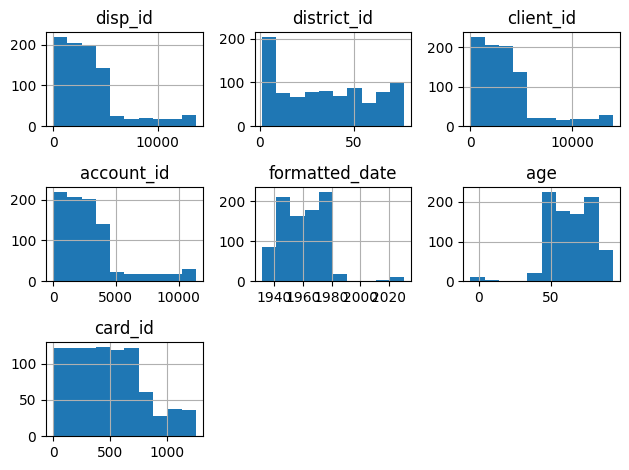

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns

df_client.hist()
plt.tight_layout()
plt.show()

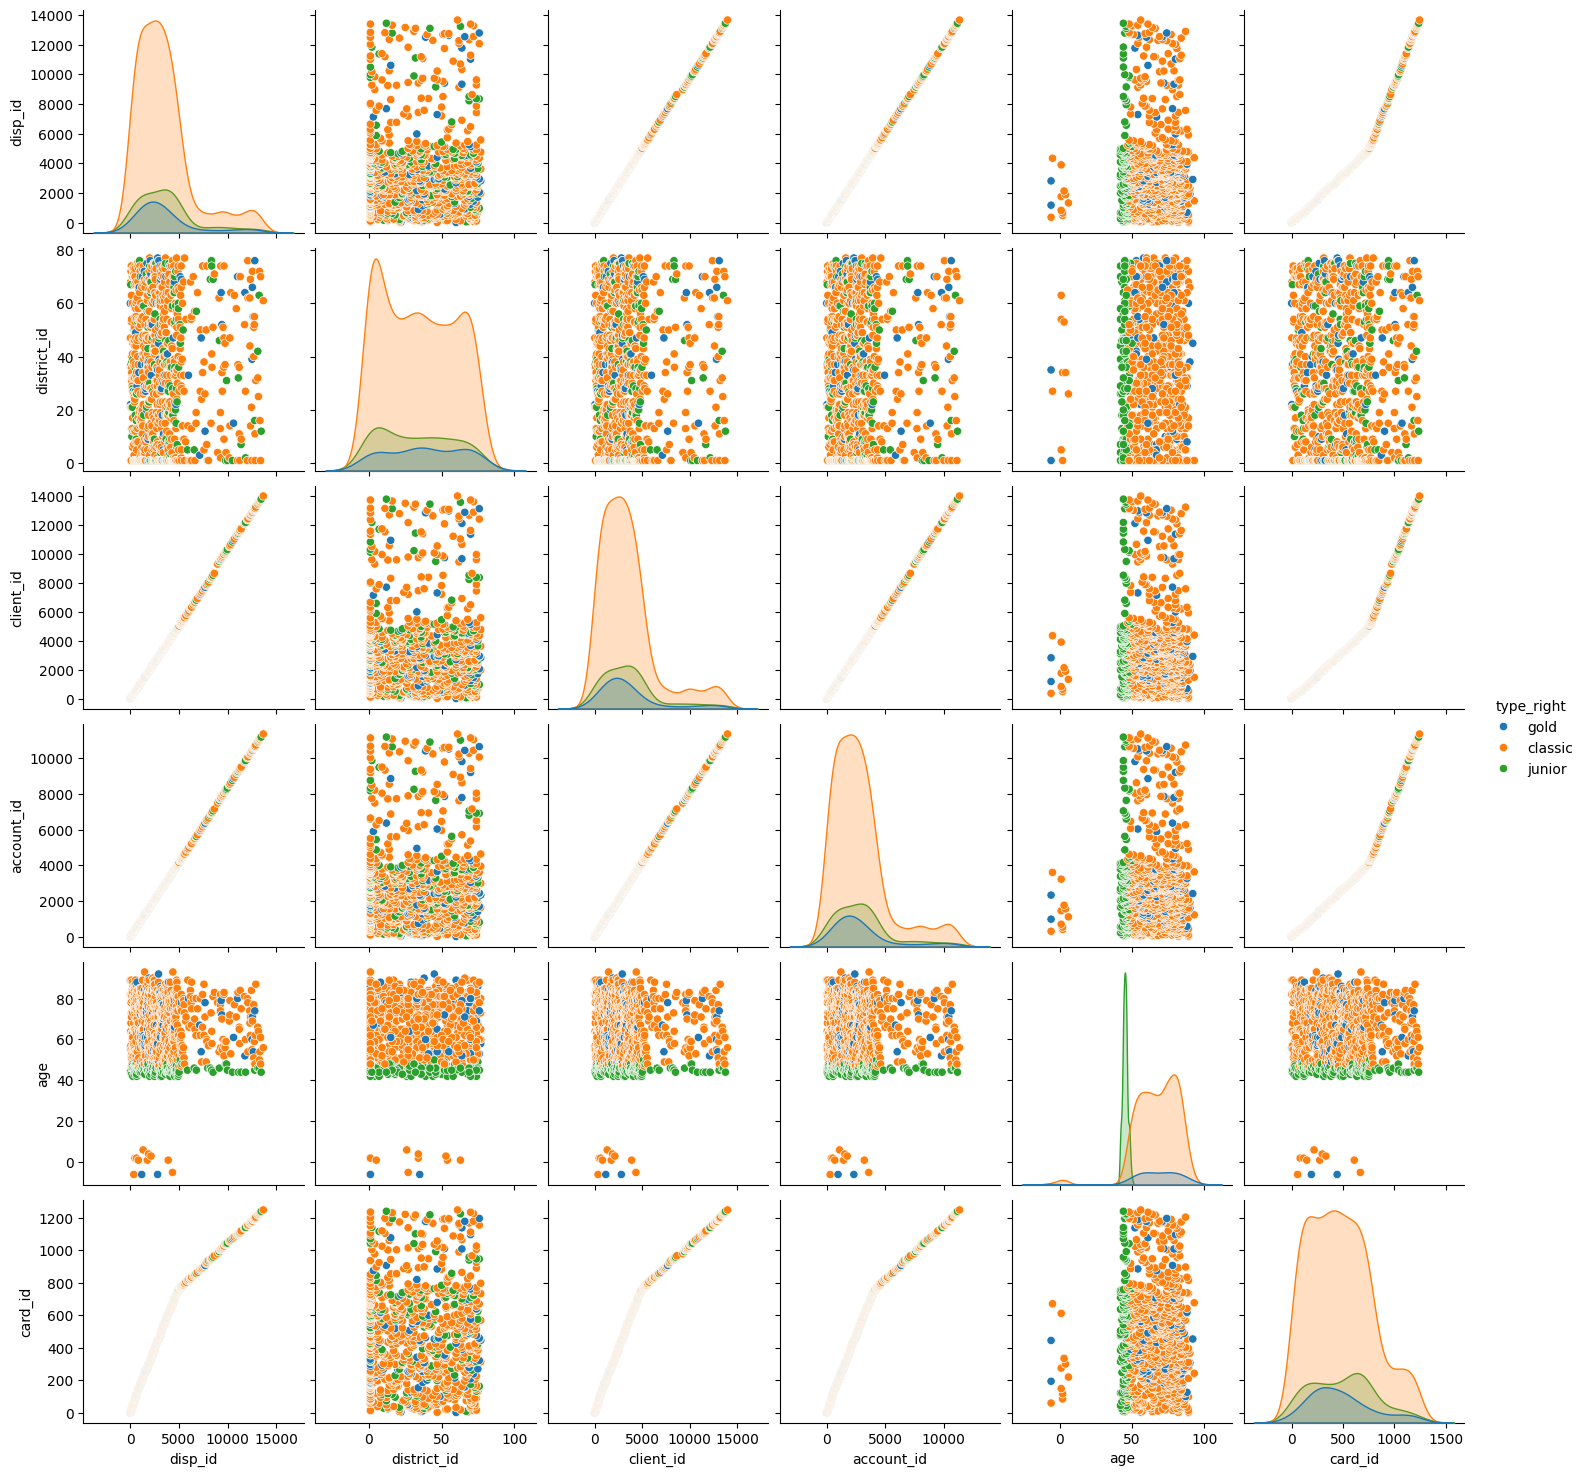

In [649]:
sns.pairplot(df_client, hue="type_right")

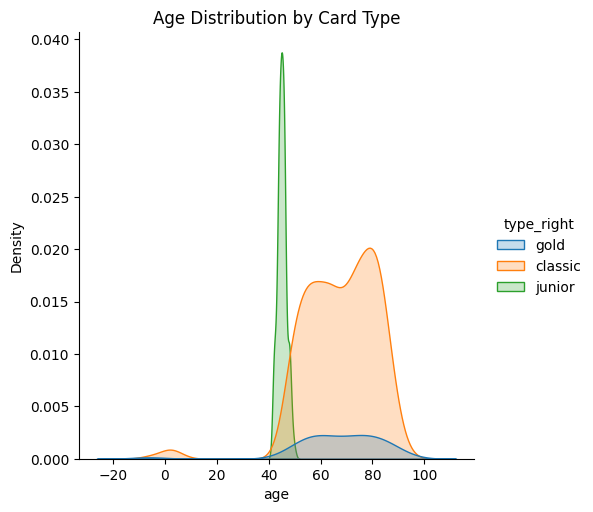

In [651]:
sns.displot(df_client, x='age', hue='type_right', kind='kde', fill=True)
plt.title('Age Distribution by Card Type')
plt.show()

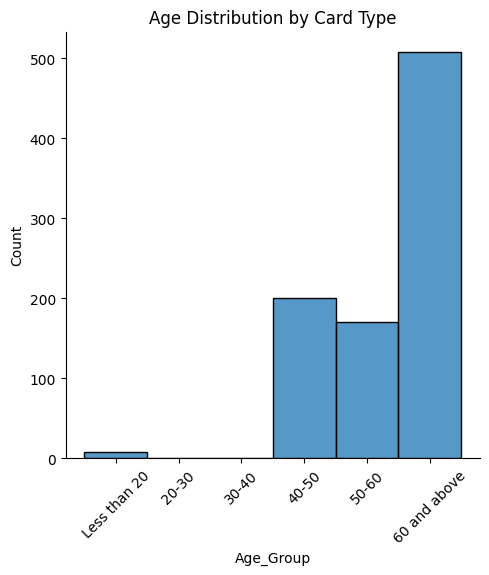

<Figure size 640x480 with 0 Axes>

In [664]:
ax = sns.displot(df_client, x='Age_Group',  multiple='dodge')
ax.tick_params(axis='x', labelrotation=45)

plt.title('Age Distribution by Card Type')
plt.show()
plt.tight_layout()


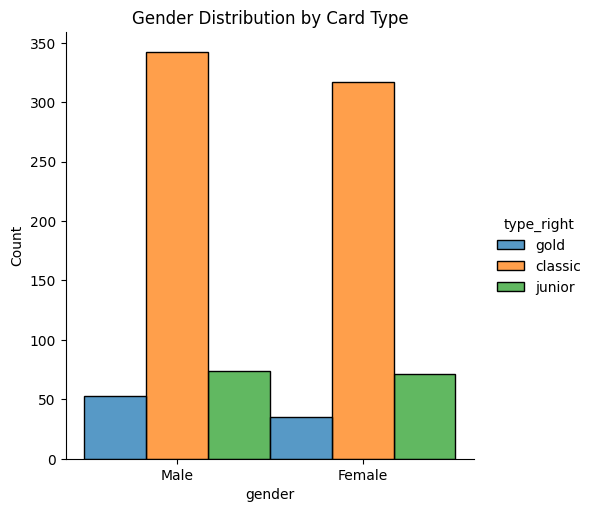

<Figure size 640x480 with 0 Axes>

In [667]:
sns.displot(df_client, x='gender', hue='type_right',  multiple='dodge')
plt.title('Gender Distribution by Card Type')
plt.show()
plt.tight_layout()

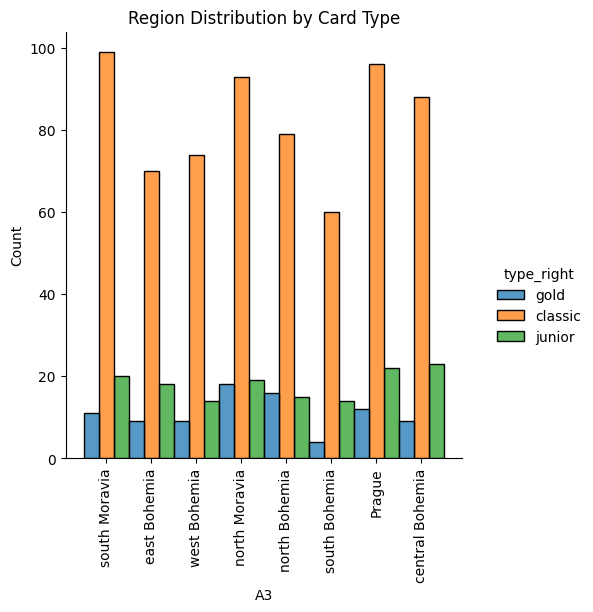

<Figure size 640x480 with 0 Axes>

In [669]:
ax = sns.displot(df_client, x='A3', hue='type_right',  multiple='dodge')
ax.tick_params(axis='x', labelrotation=90)

plt.title('Region Distribution by Card Type')
plt.show()
plt.tight_layout()

#### ii. What is the trend of card issuance at the various branches?

	Hints:
You can analyze the issuance dates from the card table. First, ensure that the issued column (which stores the issuance date) is converted to a datetime format.

	•	Tip: Use pd.to_datetime() to convert the issued column to a datetime format.
    
After you have processed the issuance dates, group by the branch (district_id) and the issuance period (month or year) to observe the trend of card issuance over time at different branches.

	•	Tip: Use groupby() on district_id and the issuance date (grouped by month or year), and then visualize using Seaborn to observe trends.

In [670]:
df_client

,disp_id,district_id,client_id,account_id,type_left,birth_number,gender,formatted_date,age,A3,Age_Group,card_id,type_right,issued
8,9,60,9,7,OWNER,351016,Male,1935-10-16,89,south Moravia,60 and above,1.0,gold,981016 00:00:00
18,19,47,19,14,OWNER,421228,Male,1942-12-28,82,east Bohemia,60 and above,2.0,classic,980313 00:00:00
38,41,22,41,33,OWNER,680827,Male,1968-08-27,56,west Bohemia,50-60,3.0,gold,950903 00:00:00
39,42,68,42,34,OWNER,350817,Male,1935-08-17,89,north Moravia,60 and above,4.0,classic,981126 00:00:00
48,51,36,51,43,OWNER,796202,Female,1979-12-02,45,north Bohemia,40-50,5.0,junior,950424 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,13312,16,13620,11079,OWNER,700726,Male,1970-07-26,54,south Bohemia,50-60,1230.0,classic,980308 00:00:00
5349,13382,70,13690,11138,OWNER,630516,Male,1963-05-16,61,north Moravia,60 and above,1233.0,classic,960706 00:00:00
5350,13386,1,13694,11141,OWNER,765120,Female,1976-01-20,48,Prague,40-50,1234.0,classic,971128 00:00:00
5351,13442,12,13750,11186,OWNER,806113,Female,1980-11-13,44,central Bohemia,40-50,1239.0,junior,980202 00:00:00


In [672]:
df_client['issued'] = pd.to_datetime(df_client['issued'], format='%y%m%d %H:%M:%S')
df_client

,disp_id,district_id,client_id,account_id,type_left,birth_number,gender,formatted_date,age,A3,Age_Group,card_id,type_right,issued
8,9,60,9,7,OWNER,351016,Male,1935-10-16,89,south Moravia,60 and above,1.0,gold,1998-10-16
18,19,47,19,14,OWNER,421228,Male,1942-12-28,82,east Bohemia,60 and above,2.0,classic,1998-03-13
38,41,22,41,33,OWNER,680827,Male,1968-08-27,56,west Bohemia,50-60,3.0,gold,1995-09-03
39,42,68,42,34,OWNER,350817,Male,1935-08-17,89,north Moravia,60 and above,4.0,classic,1998-11-26
48,51,36,51,43,OWNER,796202,Female,1979-12-02,45,north Bohemia,40-50,5.0,junior,1995-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,13312,16,13620,11079,OWNER,700726,Male,1970-07-26,54,south Bohemia,50-60,1230.0,classic,1998-03-08
5349,13382,70,13690,11138,OWNER,630516,Male,1963-05-16,61,north Moravia,60 and above,1233.0,classic,1996-07-06
5350,13386,1,13694,11141,OWNER,765120,Female,1976-01-20,48,Prague,40-50,1234.0,classic,1997-11-28
5351,13442,12,13750,11186,OWNER,806113,Female,1980-11-13,44,central Bohemia,40-50,1239.0,junior,1998-02-02


In [686]:
df_issuance_district = df_client.groupby(['district_id', df_client['issued'].dt.year]).size().reset_index(name='count')
df_issuance_district

,district_id,issued,count
0,1,1994,2
1,1,1995,8
2,1,1996,10
3,1,1997,35
4,1,1998,75
...,...,...,...
254,76,1998,6
255,77,1994,1
256,77,1996,1
257,77,1997,1


C:\Users\aiswa\AppData\Local\Temp\ipykernel_26680\2793893973.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=df_issuance_district, x='district_id', y='count', hue='issued', palette=palette)


Text(0.5, 1.0, 'Card issued by Year and District')

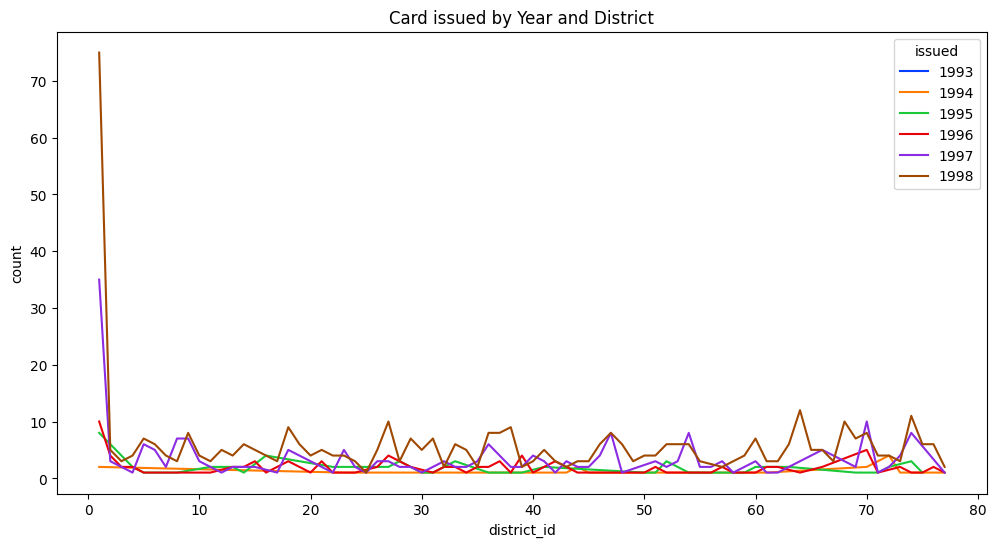

In [704]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("bright")
sns.lineplot(data=df_issuance_district, x='district_id', y='count', hue='issued', palette=palette)

plt.title("Card issued by Year and District")

In [711]:
df_issuance_district.nlargest(10, 'count')

,district_id,issued,count
4,1,1998,75
3,1,1997,35
216,64,1998,12
249,74,1998,11
2,1,1996,10
85,27,1998,10
224,68,1998,10
231,70,1997,10
58,18,1998,9
124,38,1998,9


In [705]:
df_issuance_district2 = df_client.groupby(['district_id', df_client['issued'].dt.month]).size().reset_index(name='count')
df_issuance_district2

,district_id,issued,count
0,1,1,10
1,1,2,7
2,1,3,11
3,1,4,7
4,1,5,8
...,...,...,...
495,77,2,1
496,77,6,1
497,77,7,1
498,77,11,1


In [710]:
df_issuance_district2.nlargest(10, 'count')

,district_id,issued,count
7,1,8,19
10,1,11,18
9,1,10,14
8,1,9,13
2,1,3,11
0,1,1,10
4,1,5,8
5,1,6,8
11,1,12,8
1,1,2,7


C:\Users\aiswa\AppData\Local\Temp\ipykernel_26680\1685839599.py:3: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_issuance_district2, x='district_id', y='count', hue='issued', palette=palette)


Text(0.5, 1.0, 'Card issued by Month and District')

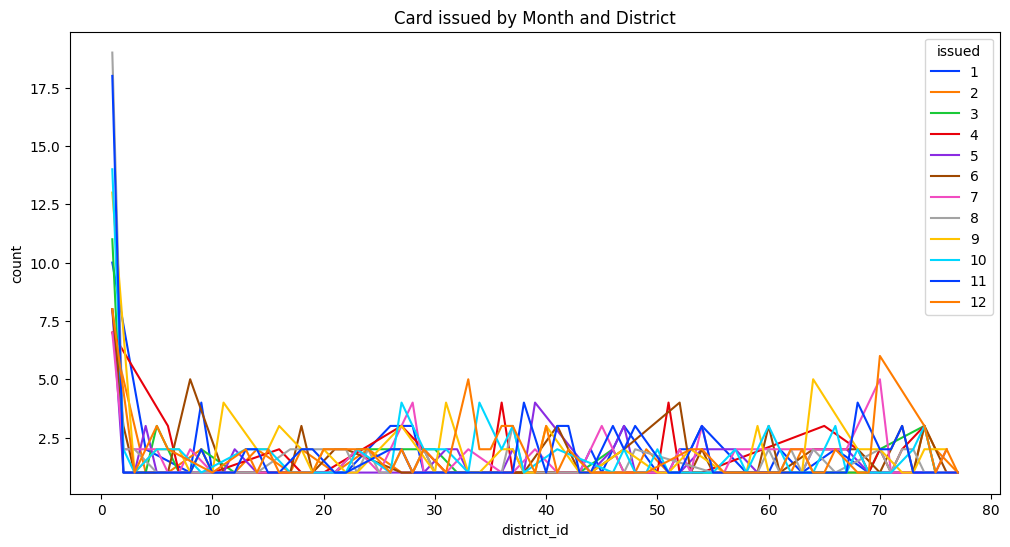

In [708]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("bright")
sns.lineplot(data=df_issuance_district2, x='district_id', y='count', hue='issued', palette=palette)

plt.title("Card issued by Month and District")

### c. Loans


#### i. What is the distribution of loan quantum given out by the bank?

	Hints:
You can use a bar chart or histogram to plot the distribution


In [712]:
df_district_loan

,District,Total Accounts,Total Loan Amount
0,1,554,12932412
1,2,42,887952
2,3,50,1460796
3,4,48,1106520
4,5,65,1901160
...,...,...,...
72,73,56,1493076
73,74,135,3260220
74,75,51,695628
75,76,55,829644


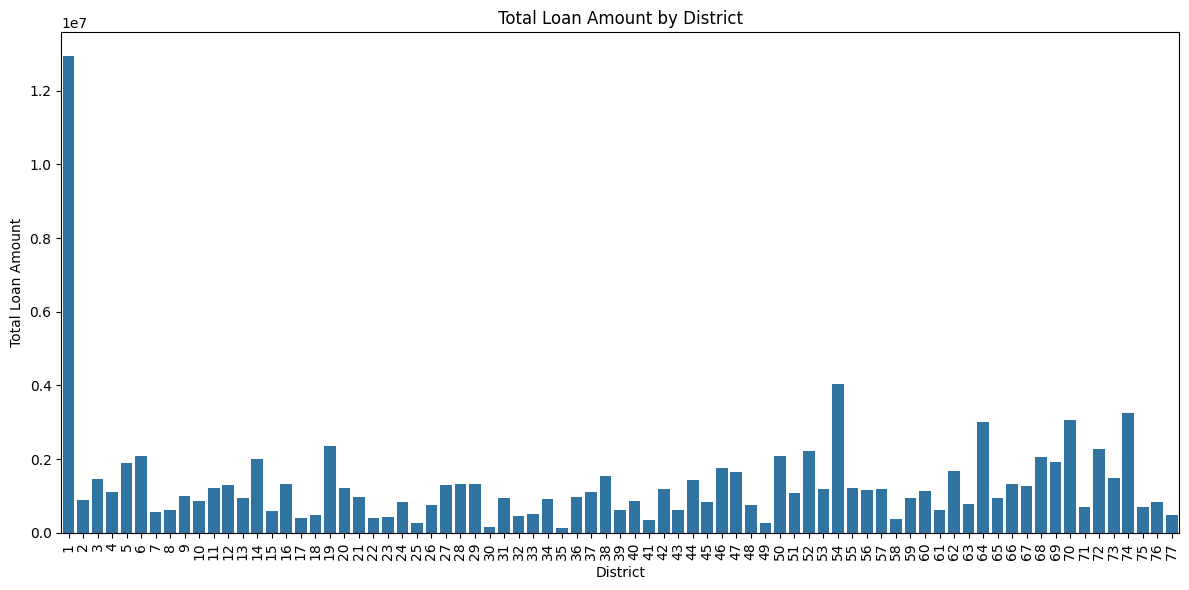

In [735]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_district_loan, x='District', y='Total Loan Amount')
plt.title('Total Loan Amount by District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### ii. What is the relation between loan quantum and average salary?

	Hint:
You can utilize a scatter plot to plot the relationship. Make sure both variables are of the correct type.


In [742]:
query = """
SELECT AVG(A11) AS average_salary, A1 
FROM district
GROUP BY A1;
"""

#Display results
df_salary = pd.read_sql_query(query, con)
df_salary

,average_salary,A1
0,12541.0,1
1,8507.0,2
2,8980.0,3
3,9753.0,4
4,9307.0,5
...,...,...
72,8746.0,73
73,10673.0,74
74,8819.0,75
75,8369.0,76


In [743]:
print(df_salary.columns)

Index(['average_salary', 'A1'], dtype='object')


In [744]:
df_salary = pd.DataFrame(df_salary)

print('After merging:')
df_salary.set_index('A1', inplace=True)
df_district_loan.set_index('District', inplace=True)
df_salary = df_salary.join(df_district_loan, lsuffix='_left', rsuffix='_right', how='outer').reset_index()
df_salary

After merging:


,A1,average_salary,Total Accounts,Total Loan Amount
0,1,12541.0,554,12932412
1,2,8507.0,42,887952
2,3,8980.0,50,1460796
3,4,9753.0,48,1106520
4,5,9307.0,65,1901160
...,...,...,...,...
72,73,8746.0,56,1493076
73,74,10673.0,135,3260220
74,75,8819.0,51,695628
75,76,8369.0,55,829644


<Axes: xlabel='average_salary', ylabel='Total Loan Amount'>

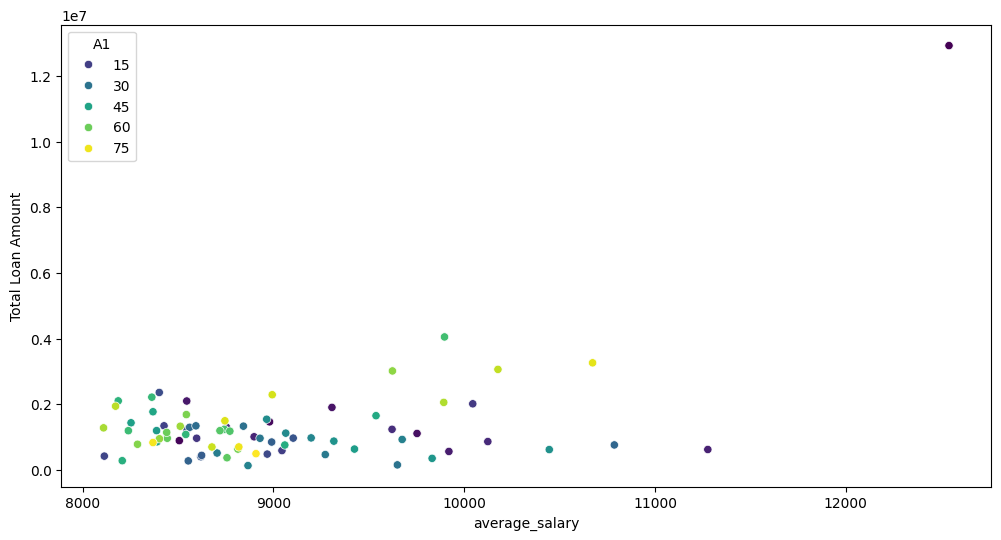

In [757]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_salary, x='average_salary', y='Total Loan Amount', hue='A1', palette='viridis')

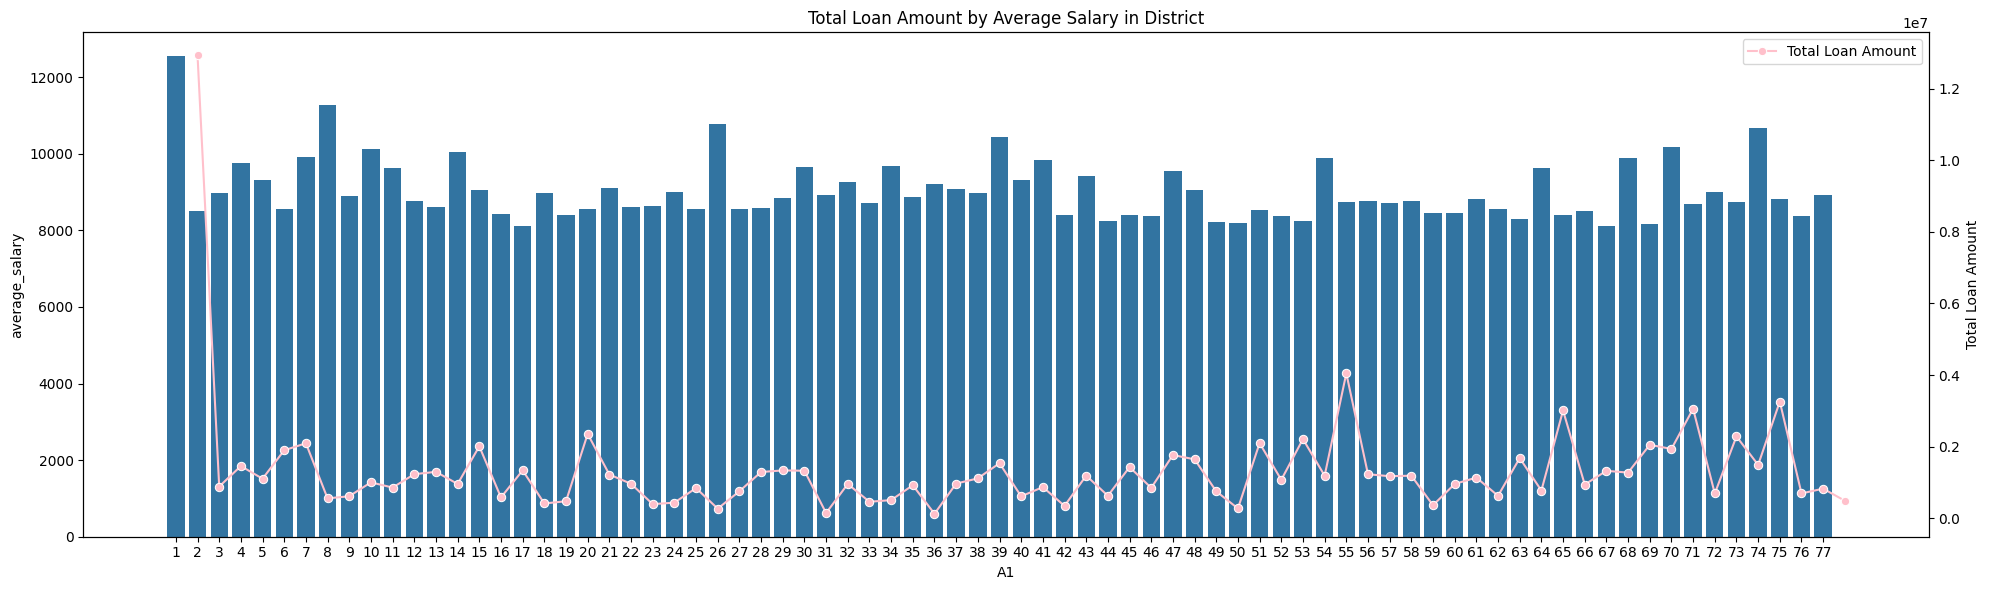

In [772]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_salary, x='A1', y='average_salary')

# Create a line plot for Total Loan Amount on the secondary y-axis
ax2 = plt.gca().twinx()
sns.lineplot(data=df_salary, x='A1', y='Total Loan Amount', color='pink', marker='o', ax=ax2, label='Total Loan Amount')

plt.title('Total Loan Amount by Average Salary in District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### iii. Examine the relationship between the number of loans in arrears and the unemployment rate at the time.

	Hints:

	1.	Hint 1:
Filter the loan table for loans in arrears (e.g., status ‘B’ for overdue).

	•	Tip: Use .loc[] to filter by loan status
	2.	Hint 2:
Merge the loan table with the district table to get the unemployment rate by district.

	•	Tip: Use pd.merge() on district_id.
	3.	Hint 3:
Compare the number of loans in arrears per district with the unemployment rate using a scatter plot.

	•	Tip: Use sns.scatterplot() to visualize the relationship.

In [785]:
query = ("""
SELECT 
    district.A1, 
    AVG(district.A12) AS Unemployment_1995, 
    AVG(district.A13) AS Unemployment_1996, 
    loan.account_id,
    AVG(loan.amount) AS Average_Loan_Amount,
    loan.status,
    account.district_id,
    account.account_id
FROM 
    district
INNER JOIN 
    account ON district.A1 = account.district_id
INNER JOIN 
    loan ON account.account_id = loan.account_id
GROUP BY 
    status, A1
""")
district_loan_unemploy = c.fetchall()

#Display results
district_loan_unemploy = pd.read_sql_query(query, con)
district_loan_unemploy

,A1,Unemployment_1995,Unemployment_1996,account_id,Average_Loan_Amount,status,district_id,account_id
0,1,0.29,0.43,2,87810.0,A,1,2
1,2,1.67,1.85,4727,107640.0,A,2,4727
2,3,1.95,2.21,3329,19248.0,A,3,3329
3,4,4.64,5.05,7454,42192.0,A,4,7454
4,5,3.85,4.43,4863,115860.0,A,5,4863
...,...,...,...,...,...,...,...,...
193,70,6.63,7.75,2335,233624.0,D,70,2335
194,71,5.93,5.57,3166,177744.0,D,71,3166
195,72,3.80,4.79,4794,465504.0,D,72,4794
196,73,3.33,3.74,2236,199932.0,D,73,2236


In [783]:
district_loan_unemploy = pd.DataFrame(district_loan_unemploy)

<Axes: xlabel='A1', ylabel='Unemployment_1995'>

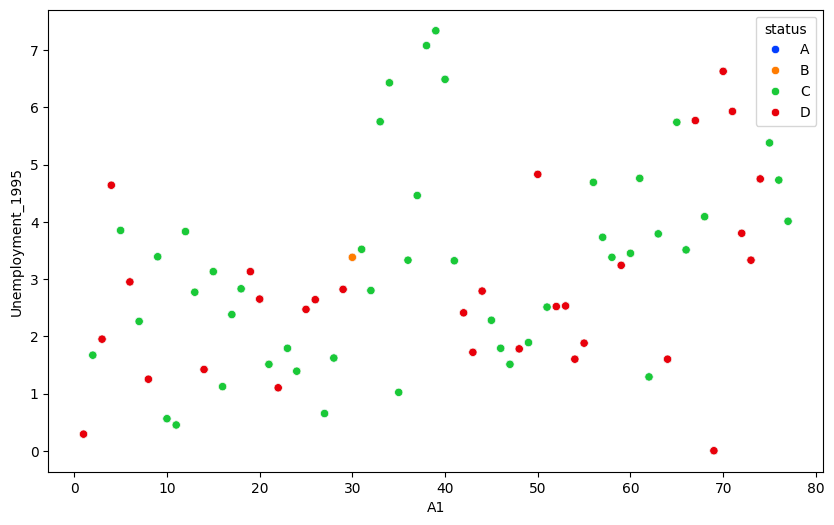

In [804]:
# Scatter plot for Unemployment_1995 vs Average Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district_loan_unemploy,
                 x='A1',
                 y='Unemployment_1995',
                 hue='status',
                 palette='bright')

<Axes: xlabel='A1', ylabel='Unemployment_1996'>

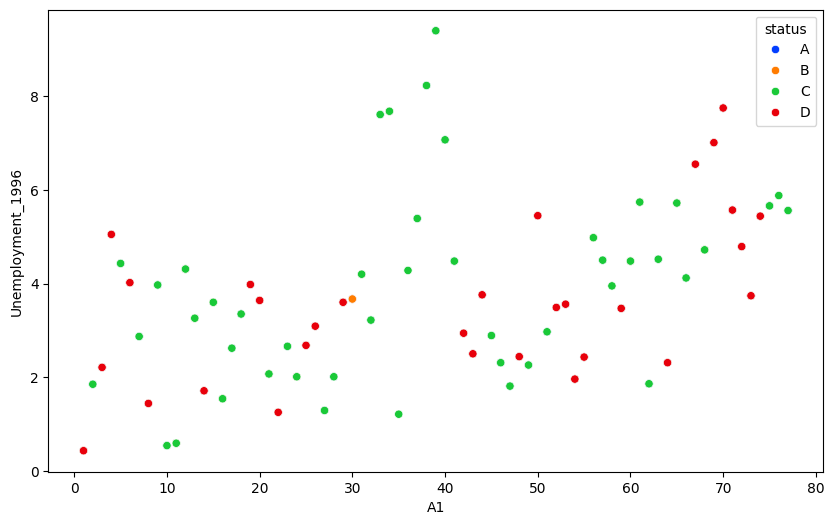

In [805]:
# Scatter plot for Unemployment_1995 vs Average Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=district_loan_unemploy,
                 x='A1',
                 y='Unemployment_1996',
                 hue='status',
                 palette='bright')

#### iv. In the loan DataFrame, check for outliers in the amount column. 
#### Remove or treat the outliers based on the interquartile range (IQR) method (outliers are values that are 1.5 times the IQR above the third quartile or below the first quartile).

	•	Hint: Use .quantile() to calculate the IQR and .loc[] to filter outliers.

In [807]:
query = ("""
SELECT *
FROM 
    loan
""")

#Display results
district_loan_outlier = pd.read_sql_query(query, con)
district_loan_outlier

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


In [808]:
district_loan_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


In [810]:
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

In [811]:
Loan_amount = (district_loan_outlier['amount'])

print(f"""
Key Breakdown for Loan Amount
The mean is {Loan_amount.mean()}
The median is {Loan_amount.median()}
The standard devation is {Loan_amount.std()}
The first quartile is {Loan_amount.quantile(.25)}
The third quartile is {Loan_amount.quantile(.75)}
The range is {Loan_amount.max() - Loan_amount.min()}
The IQR is {iqr(Loan_amount)}
The lower fence is {Loan_amount.quantile(.25) - 1.5 * iqr(Loan_amount)}
The upper fence is {Loan_amount.quantile(.75) + 1.5 * iqr(Loan_amount)}
""")


Key Breakdown for Loan Amount
The mean is 151410.1759530792
The median is 116928.0
The standard devation is 113372.4063095917
The first quartile is 66732.0
The third quartile is 210654.0
The range is 585840
The IQR is 143922.0
The lower fence is -149151.0
The upper fence is 426537.0



Text(0.5, 1.0, 'Loan Amount distribution')

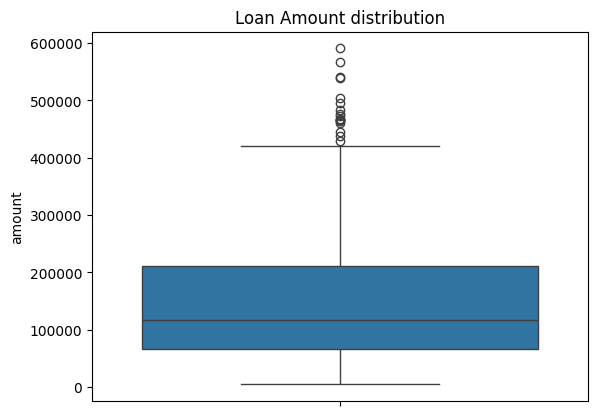

In [815]:
sns.boxplot(y='amount', data=district_loan_outlier).set_title("Loan Amount distribution")

In [820]:
first_quartile = 66732.0
third_quartile = 210654.0

df_cleaned = district_loan_outlier[(district_loan_outlier['amount'] > first_quartile) & 
                 (district_loan_outlier['amount'] < third_quartile)]

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
df_cleaned

Cleaned DataFrame:


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
5,6687,8261,930913,87840,24,3660.0,A
...,...,...,...,...,...,...,...
670,6168,5698,981121,99216,36,2756.0,C
672,5036,309,981125,91248,48,1901.0,C
674,6856,9156,981201,163332,36,4537.0,C
676,5027,276,981202,160920,36,4470.0,C


Text(0.5, 1.0, 'Loan Amount distribution')

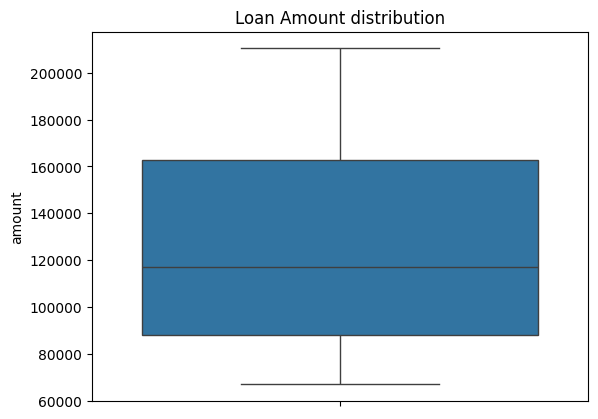

In [821]:
sns.boxplot(y='amount', data=df_cleaned).set_title("Loan Amount distribution")

### d. Transactions

#### i. Which region has the lowest average number of transactions?

In [871]:
query = """
SELECT 
    account.district_id,
    account.account_id,
    district.A1,
    district.A3,
    transactions.type,
    transactions.operation,
    transactions.amount,
    transactions.k_symbol
FROM 
    transactions
INNER JOIN 
    account ON  transactions.account_id = account.account_id
INNER JOIN 
    district ON account.district_id = district.A1
GROUP BY 
    account.district_id, district.A1, district.A3, account.account_id
"""

df_transaction_region = pd.read_sql_query(query, con)
df_transaction_region

,district_id,account_id,A1,A3,type,operation,amount,k_symbol
0,1,2,1,Prague,PRIJEM,VKLAD,1100.0,None
1,1,17,1,Prague,PRIJEM,VKLAD,700.0,None
2,1,22,1,Prague,PRIJEM,VKLAD,1100.0,None
3,1,36,1,Prague,PRIJEM,VKLAD,500.0,None
4,1,49,1,Prague,PRIJEM,VKLAD,300.0,None
...,...,...,...,...,...,...,...,...
4495,77,4631,77,north Moravia,PRIJEM,VKLAD,800.0,None
4496,77,5228,77,north Moravia,PRIJEM,VKLAD,1000.0,None
4497,77,5817,77,north Moravia,PRIJEM,VKLAD,400.0,None
4498,77,7181,77,north Moravia,PRIJEM,VKLAD,600.0,None


In [877]:
query = """
SELECT 
    account.district_id,
    account.account_id,
    district.A1,
    district.A3,
    transactions.type,
    transactions.operation,
    transactions.amount,
    transactions.k_symbol
FROM 
    transactions
INNER JOIN 
    account ON  transactions.account_id = account.account_id
INNER JOIN 
    district ON account.district_id = district.A1
GROUP BY 
    account.district_id, district.A3, account.account_id
"""

df_transaction_region = pd.read_sql_query(query, con)
df_transaction_region

,district_id,account_id,A1,A3,type,operation,amount,k_symbol
0,1,2,1,Prague,PRIJEM,VKLAD,1100.0,None
1,1,17,1,Prague,PRIJEM,VKLAD,700.0,None
2,1,22,1,Prague,PRIJEM,VKLAD,1100.0,None
3,1,36,1,Prague,PRIJEM,VKLAD,500.0,None
4,1,49,1,Prague,PRIJEM,VKLAD,300.0,None
...,...,...,...,...,...,...,...,...
4495,77,4631,77,north Moravia,PRIJEM,VKLAD,800.0,None
4496,77,5228,77,north Moravia,PRIJEM,VKLAD,1000.0,None
4497,77,5817,77,north Moravia,PRIJEM,VKLAD,400.0,None
4498,77,7181,77,north Moravia,PRIJEM,VKLAD,600.0,None


In [878]:
df_transaction_region = pd.DataFrame(df_transaction_region)

In [879]:
df_transaction_region = df_transaction_region.drop(columns=['A1'])
df_transaction_region

,district_id,account_id,A3,type,operation,amount,k_symbol
0,1,2,Prague,PRIJEM,VKLAD,1100.0,None
1,1,17,Prague,PRIJEM,VKLAD,700.0,None
2,1,22,Prague,PRIJEM,VKLAD,1100.0,None
3,1,36,Prague,PRIJEM,VKLAD,500.0,None
4,1,49,Prague,PRIJEM,VKLAD,300.0,None
...,...,...,...,...,...,...,...
4495,77,4631,north Moravia,PRIJEM,VKLAD,800.0,None
4496,77,5228,north Moravia,PRIJEM,VKLAD,1000.0,None
4497,77,5817,north Moravia,PRIJEM,VKLAD,400.0,None
4498,77,7181,north Moravia,PRIJEM,VKLAD,600.0,None


In [880]:
transaction_counts = df_transaction_region.groupby('A3').size().reset_index(name='TransactionCount')
transaction_counts.sort_values(by='TransactionCount', ascending=False)

,A3,TransactionCount
4,north Moravia,793
6,south Moravia,778
1,central Bohemia,574
0,Prague,554
2,east Bohemia,544
3,north Bohemia,457
7,west Bohemia,430
5,south Bohemia,370


#### ii. What is the breakdown of the various transaction types?

	Hint: Use a bar chart to show the distribution of different transaction types (e.g., k_symbol).
	•	Tip: Use sns.countplot() to create a bar plot showing the frequency of each transaction type.

In [881]:
transaction_types= df_transaction_region.groupby('operation').size().reset_index()
transaction_types

,operation,0
0,PREVOD Z UCTU,11
1,VKLAD,4489


#### iii. What are the top 5 accounts with the highest total transaction amounts?
	Hint: 
Group the transactions by account_id, calculate the total amount for each account, and visualize the top 5 accounts using a bar plot.

	•	Tip: Use groupby() to calculate the total amounts and sns.barplot() for visualization.

In [892]:
transaction_counts = df_transaction_region.groupby(['account_id', 'amount']).size().reset_index(name='TransactionCount')
sorted_transaction_counts = transaction_counts.sort_values(by=['account_id', 'amount'])
sorted_transaction_account

,account_id,TransactionCount
4499,11382,1
0,1,1
1,2,1
2,3,1
4483,11141,1
...,...,...
8,9,1
7,8,1
6,7,1
5,6,1


In [924]:
transaction_counts = df_transaction_region.groupby(['account_id', 'amount']).size().reset_index(name='TransactionCount')
total_amounts = df_transaction_region.groupby('account_id')['amount'].sum().reset_index()
total_amounts.columns = ['account_id', 'Total Transaction Amount']
merged_counts = pd.merge(transaction_counts, total_amounts, on='account_id')
sorted_transaction_counts = merged_counts.sort_values(by='Total Transaction Amount', ascending=False)
sorted_transaction_counts

,account_id,amount,TransactionCount,Total Transaction Amount
2721,2862,36070.0,1,36070.0
4019,5194,29001.0,1,29001.0
3863,4240,27666.0,1,27666.0
2596,2728,27131.0,1,27131.0
2060,2162,26891.0,1,26891.0
...,...,...,...,...
3588,3779,200.0,1,200.0
3615,3806,200.0,1,200.0
3611,3802,200.0,1,200.0
3610,3801,200.0,1,200.0


In [931]:
top_accounts = sorted_transaction_counts.sort_values(by='Total Transaction Amount', ascending=False).head(10)
top_accounts

,account_id,amount,TransactionCount,Total Transaction Amount
2721,2862,36070.0,1,36070.0
4019,5194,29001.0,1,29001.0
3863,4240,27666.0,1,27666.0
2596,2728,27131.0,1,27131.0
2060,2162,26891.0,1,26891.0
954,998,24608.0,1,24608.0
2066,2169,23047.0,1,23047.0
1480,1559,22823.0,1,22823.0
1053,1103,20963.0,1,20963.0
2467,2593,19379.0,1,19379.0


<Axes: xlabel='account_id', ylabel='Total Transaction Amount'>

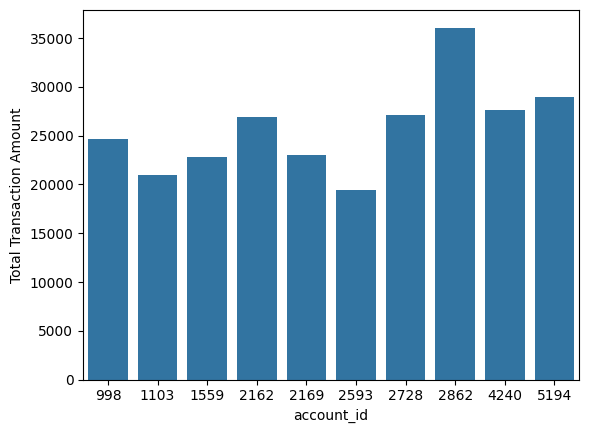

In [930]:
sns.barplot(data=top_accounts,
             x='account_id',
             y='Total Transaction Amount')

## 3- (Merging- Data Cleaning)
### Merge the entire Data , keeping in mind that all observations in the loan table are important as these are the people who applied for loans

In [1002]:
df_merged = pd.read_csv('merged_data.csv')
df_merged.head()

C:\Users\aiswa\AppData\Local\Temp\ipykernel_26680\4216467938.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('merged_data.csv')


,loan_id,account_id,date_x,amount_x,duration,payments,status,district_id,frequency,date_y,...,type,operation,amount_y,balance,k_symbol,bank,account,A1,A3,A12
0,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN,30,west Bohemia,3.38
1,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,9900.0,11000.0,NaN,NaN,NaN,30,west Bohemia,3.38
2,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,5800.0,16800.0,NaN,NaN,NaN,30,west Bohemia,3.38
3,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,3300.0,20100.0,NaN,NaN,NaN,30,west Bohemia,3.38
4,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,42248.0,62348.0,NaN,NaN,NaN,30,west Bohemia,3.38


In [1003]:
df_client.head()

,disp_id,district_id,client_id,account_id,type_left,birth_number,gender,formatted_date,age,A3,Age_Group,card_id,type_right,issued
8,9,60,9,7,OWNER,351016,Male,1935-10-16,89,south Moravia,60 and above,1.0,gold,1998-10-16
18,19,47,19,14,OWNER,421228,Male,1942-12-28,82,east Bohemia,60 and above,2.0,classic,1998-03-13
38,41,22,41,33,OWNER,680827,Male,1968-08-27,56,west Bohemia,50-60,3.0,gold,1995-09-03
39,42,68,42,34,OWNER,350817,Male,1935-08-17,89,north Moravia,60 and above,4.0,classic,1998-11-26
48,51,36,51,43,OWNER,796202,Female,1979-12-02,45,north Bohemia,40-50,5.0,junior,1995-04-24


In [1004]:
df_final = pd.merge(df_merged, df_client, on='account_id', how='outer')
df_final

,loan_id,account_id,date_x,amount_x,duration,payments,status,district_id_x,frequency,date_y,...,type_left,birth_number,gender,formatted_date,age,A3_y,Age_Group,card_id,type_right,issued
0,4959.0,2,940105.0,80952.0,24.0,3373.0,A,1.0,POPLATEK MESICNE,1993-02-26,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
1,4959.0,2,940105.0,80952.0,24.0,3373.0,A,1.0,POPLATEK MESICNE,1993-02-26,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2,4959.0,2,940105.0,80952.0,24.0,3373.0,A,1.0,POPLATEK MESICNE,1993-02-26,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
3,4959.0,2,940105.0,80952.0,24.0,3373.0,A,1.0,POPLATEK MESICNE,1993-02-26,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
4,4959.0,2,940105.0,80952.0,24.0,3373.0,A,1.0,POPLATEK MESICNE,1993-02-26,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192273,7308.0,11362,961227.0,129408.0,24.0,5392.0,A,67.0,POPLATEK MESICNE,1995-10-14,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
192274,7308.0,11362,961227.0,129408.0,24.0,5392.0,A,67.0,POPLATEK MESICNE,1995-10-14,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
192275,7308.0,11362,961227.0,129408.0,24.0,5392.0,A,67.0,POPLATEK MESICNE,1995-10-14,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
192276,7308.0,11362,961227.0,129408.0,24.0,5392.0,A,67.0,POPLATEK MESICNE,1995-10-14,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT


In [1005]:
query= ("""
SELECT A1, A2, A11, A9, A10, A14, A15, A16, A12, A13
FROM district
""")
df_district = pd.read_sql_query(query, con)
df_district

,A1,A2,A11,A9,A10,A14,A15,A16,A12,A13
0,1,Hl.m. Praha,12541,1,100.0,167,85677,99107,0.29,0.43
1,2,Benesov,8507,5,46.7,132,2159,2674,1.67,1.85
2,3,Beroun,8980,5,41.7,111,2824,2813,1.95,2.21
3,4,Kladno,9753,6,67.4,109,5244,5892,4.64,5.05
4,5,Kolin,9307,6,51.4,118,2616,3040,3.85,4.43
...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,8746,7,56.4,90,4355,4433,3.33,3.74
73,74,Ostrava - mesto,10673,1,100.0,100,18782,18347,4.75,5.44
74,75,Prerov,8819,5,64.6,99,4063,4505,5.38,5.66
75,76,Sumperk,8369,7,51.2,107,3736,2807,4.73,5.88


In [1006]:
df_district = pd.DataFrame(df_district)

print('After merging:')
df_district.set_index('A1', inplace=True)
df_final.set_index('district_id_x', inplace=True)
df_final2 = df_final.join(df_district, lsuffix='_left', rsuffix='_right', how='outer').reset_index()
df_final2

After merging:


,district_id_x,loan_id,account_id,date_x,amount_x,duration,payments,status,frequency,date_y,...,issued,A2,A11,A9,A10,A14,A15,A16,A12_right,A13
0,1.0,4959.0,2,940105.0,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
1,1.0,4959.0,2,940105.0,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
2,1.0,4959.0,2,940105.0,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
3,1.0,4959.0,2,940105.0,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
4,1.0,4959.0,2,940105.0,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192273,NaN,NaN,10227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1996-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192274,NaN,NaN,10558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1998-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192275,NaN,NaN,10562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1998-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192276,NaN,NaN,10607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1998-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### i. Preprocess the data and handle any missing values after merging 

In [1007]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192278 entries, 0 to 192277
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   district_id_x   191556 non-null  float64       
 1   loan_id         191556 non-null  float64       
 2   account_id      192278 non-null  int64         
 3   date_x          191556 non-null  float64       
 4   amount_x        191556 non-null  float64       
 5   duration        191556 non-null  float64       
 6   payments        191556 non-null  float64       
 7   status          191556 non-null  object        
 8   frequency       191556 non-null  object        
 9   date_y          191556 non-null  object        
 10  year_month      191556 non-null  object        
 11  trans_id        191556 non-null  float64       
 12  date            191556 non-null  float64       
 13  type            191556 non-null  object        
 14  operation       160218 non-null  obj

In [1008]:
df_final2.describe()

,district_id_x,loan_id,account_id,date_x,amount_x,duration,payments,trans_id,date,amount_y,...,formatted_date,age,card_id,issued,A11,A9,A10,A14,A16,A13
count,191556.000000,191556.000000,192278.000000,191556.000000,191556.000000,191556.000000,191556.000000,1.915560e+05,191556.000000,191556.000000,...,47849,47849.000000,47849.000000,47849,191556.000000,191556.000000,191556.000000,191556.000000,191556.000000,191556.000000
mean,37.065882,6203.789393,5959.822164,956841.501488,146579.898703,35.689657,4173.535927,2.070612e+06,966346.713133,8276.680102,...,1960-01-22 15:26:00.784969408,64.427365,814.387866,1997-07-23 04:09:09.227779200,9553.225391,5.317583,68.617560,122.093633,17416.909160,3.495440
min,1.000000,4959.000000,2.000000,930705.000000,4980.000000,12.000000,304.000000,2.760000e+02,930113.000000,0.000000,...,1931-05-13 00:00:00,-6.000000,1.000000,1993-11-07 00:00:00,8110.000000,1.000000,33.900000,81.000000,888.000000,0.430000
25%,12.000000,5599.000000,3064.000000,941012.000000,64860.000000,24.000000,2454.000000,1.096621e+06,960309.000000,200.000000,...,1948-04-06 00:00:00,52.000000,577.000000,1996-09-11 00:00:00,8547.000000,4.000000,52.700000,105.000000,2252.000000,1.960000
50%,38.000000,6229.000000,6040.000000,960208.000000,111384.000000,36.000000,3900.000000,2.144294e+06,970511.000000,3600.000000,...,1959-07-17 00:00:00,65.000000,884.000000,1997-10-25 00:00:00,8994.000000,6.000000,62.100000,116.000000,3868.000000,3.490000
75%,61.000000,6764.000000,8772.000000,970522.000000,203940.000000,48.000000,5900.000000,3.110538e+06,980307.000000,10616.000000,...,1972-02-06 00:00:00,76.000000,1064.000000,1998-08-01 00:00:00,9897.000000,7.000000,87.700000,137.000000,9208.000000,4.790000
max,77.000000,7308.000000,11362.000000,981208.000000,590820.000000,60.000000,9910.000000,3.682987e+06,981231.000000,87300.000000,...,2030-10-05 00:00:00,93.000000,1247.000000,1998-12-29 00:00:00,12541.000000,11.000000,100.000000,167.000000,99107.000000,9.400000
std,25.201310,674.092168,3246.747907,14742.351366,110397.499356,17.208931,2210.176372,1.121170e+06,13613.599244,11795.614766,...,NaN,13.452943,330.118366,NaN,1346.871811,2.878472,20.431661,23.787018,32393.101441,2.164753


In [1009]:
df_final2.columns

Index(['district_id_x', 'loan_id', 'account_id', 'date_x', 'amount_x',
       'duration', 'payments', 'status', 'frequency', 'date_y', 'year_month',
       'trans_id', 'date', 'type', 'operation', 'amount_y', 'balance',
       'k_symbol', 'bank', 'account', 'A1', 'A3_x', 'A12_left', 'disp_id',
       'district_id_y', 'client_id', 'type_left', 'birth_number', 'gender',
       'formatted_date', 'age', 'A3_y', 'Age_Group', 'card_id', 'type_right',
       'issued', 'A2', 'A11', 'A9', 'A10', 'A14', 'A15', 'A16', 'A12_right',
       'A13'],
      dtype='object')

In [1010]:
df_final2.isna().sum()

district_id_x        722
loan_id              722
account_id             0
date_x               722
amount_x             722
duration             722
payments             722
status               722
frequency            722
date_y               722
year_month           722
trans_id             722
date                 722
type                 722
operation          32060
amount_y             722
balance              722
k_symbol           93169
bank              141765
account           129653
A1                   722
A3_x                 722
A12_left             722
disp_id           144429
district_id_y     144429
client_id         144429
type_left         144429
birth_number      144429
gender            144429
formatted_date    144429
age               144429
A3_y              144429
Age_Group         144433
card_id           144429
type_right        144429
issued            144429
A2                   722
A11                  722
A9                   722
A10                  722


In [1011]:
df_final2.to_csv('Final_Data.csv', index=False, encoding='utf-8')

### Drop Columns

In [1012]:
#There are three date columns
df_final2 = df_final2.drop(['date_x', 'year_month' ], axis=1)

In [1013]:
#Two a12 columns
df_final2 = df_final2.drop(['A12_left'], axis=1)

In [1014]:
#Two a12 columns
df_final2 = df_final2.drop(['district_id_y'], axis=1)

In [1015]:
#Two birth date columns
df_final2 = df_final2.drop(['birth_number'], axis=1)

In [1016]:
#Two region columns
df_final2 = df_final2.drop(['A3_y'], axis=1)

In [1017]:
df_final2.columns

Index(['district_id_x', 'loan_id', 'account_id', 'amount_x', 'duration',
       'payments', 'status', 'frequency', 'date_y', 'trans_id', 'date', 'type',
       'operation', 'amount_y', 'balance', 'k_symbol', 'bank', 'account', 'A1',
       'A3_x', 'disp_id', 'client_id', 'type_left', 'gender', 'formatted_date',
       'age', 'Age_Group', 'card_id', 'type_right', 'issued', 'A2', 'A11',
       'A9', 'A10', 'A14', 'A15', 'A16', 'A12_right', 'A13'],
      dtype='object')

### Rename Columns

In [1021]:
df_final3 = df_final2.copy()

df_final3 = pd.DataFrame(df_final3)

# Define new column names
new_column_names = [
    "district_id", "loan_id", "account_id", "amount",
    "duration", "payments", "status", "frequency", "date",
    "transaction_id", "transaction_date", "transaction_type", 
    "transaction_operation", "amount_of_money", 
    "balance_after_transaction", "k_symbol", 
    "bank_partner", "account_partner", "district", "region", 
    "disp_id", "client_id", "type_owner", 
    "gender", "birth_date", "age", 
    "age_group", "card_id", "card_type",
    "card_issued_date", "district_name",
    "average_salary", "no_of_cities", 
    "ration_of_urbanites","no_of_enterpreneur_1000",
    "no_of_crimes_95","no_of_crimes_96",
    "unemployment_95","unemployment_96"
]

df_final3.columns = new_column_names[:len(df_final3.columns)]
df_final3.head()

,district_id,loan_id,account_id,amount,duration,payments,status,frequency,date,transaction_id,...,card_issued_date,district_name,average_salary,no_of_cities,ration_of_urbanites,no_of_enterpreneur_1000,no_of_crimes_95,no_of_crimes_96,unemployment_95,unemployment_96
0,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,276.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
1,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,279.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
2,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,697.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
3,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,3530483.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
4,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,280.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43


In [1023]:
df_final3.shape

(192278, 39)

In [1025]:
df_final3.to_csv('Cleaned_Data.csv', index=False, encoding='utf-8')

### Check for duplicates

In [1027]:
df_final3 = pd.DataFrame(df_final3)

In [1029]:
# Check for duplicates based on transaction_id, transaction_date, and amount
duplicates = df_final3.duplicated(subset=['transaction_id', 'transaction_date', 'amount'], keep=False)

In [1030]:
df_cleaned = df_final3[~duplicates]

In [1031]:
df_cleaned

,district_id,loan_id,account_id,amount,duration,payments,status,frequency,date,transaction_id,...,card_issued_date,district_name,average_salary,no_of_cities,ration_of_urbanites,no_of_enterpreneur_1000,no_of_crimes_95,no_of_crimes_96,unemployment_95,unemployment_96
0,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,276.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
1,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,279.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
2,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,697.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
3,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,3530483.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
4,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,280.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191551,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,2521887.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56
191552,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,2521815.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56
191553,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,2522039.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56
191554,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,3499000.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56


In [1032]:
df_cleaned.columns

Index(['district_id', 'loan_id', 'account_id', 'amount', 'duration',
       'payments', 'status', 'frequency', 'date', 'transaction_id',
       'transaction_date', 'transaction_type', 'transaction_operation',
       'amount_of_money', 'balance_after_transaction', 'k_symbol',
       'bank_partner', 'account_partner', 'district', 'region', 'disp_id',
       'client_id', 'type_owner', 'gender', 'birth_date', 'age', 'age_group',
       'card_id', 'card_type', 'card_issued_date', 'district_name',
       'average_salary', 'no_of_cities', 'ration_of_urbanites',
       'no_of_enterpreneur_1000', 'no_of_crimes_95', 'no_of_crimes_96',
       'unemployment_95', 'unemployment_96'],
      dtype='object')

In [1034]:
df_cleaned.to_csv('Removed_Duplicates.csv', index=False, encoding='utf-8')

### Filling in NaN values

In [1035]:
df_cleaned.columns

Index(['district_id', 'loan_id', 'account_id', 'amount', 'duration',
       'payments', 'status', 'frequency', 'date', 'transaction_id',
       'transaction_date', 'transaction_type', 'transaction_operation',
       'amount_of_money', 'balance_after_transaction', 'k_symbol',
       'bank_partner', 'account_partner', 'district', 'region', 'disp_id',
       'client_id', 'type_owner', 'gender', 'birth_date', 'age', 'age_group',
       'card_id', 'card_type', 'card_issued_date', 'district_name',
       'average_salary', 'no_of_cities', 'ration_of_urbanites',
       'no_of_enterpreneur_1000', 'no_of_crimes_95', 'no_of_crimes_96',
       'unemployment_95', 'unemployment_96'],
      dtype='object')

In [1038]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191556 entries, 0 to 191555
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   district_id                191556 non-null  float64       
 1   loan_id                    191556 non-null  float64       
 2   account_id                 191556 non-null  int64         
 3   amount                     191556 non-null  float64       
 4   duration                   191556 non-null  float64       
 5   payments                   191556 non-null  float64       
 6   status                     191556 non-null  object        
 7   frequency                  191556 non-null  object        
 8   date                       191556 non-null  object        
 9   transaction_id             191556 non-null  float64       
 10  transaction_date           191556 non-null  float64       
 11  transaction_type           191556 non-null  object       

In [1050]:
df_cleaned2.isna().sum()

district_id                       0
loan_id                           0
account_id                        0
amount                            0
duration                          0
payments                          0
status                            0
frequency                         0
date                              0
transaction_id                    0
transaction_date                  0
transaction_type                  0
transaction_operation         31338
amount_of_money                   0
balance_after_transaction         0
k_symbol                      92447
bank_partner                 141043
account_partner              128931
district                          0
region                            0
disp_id                           0
client_id                    144429
type_owner                   144429
gender                       144429
birth_date                   144429
age                          144429
age_group                    144429
card_id                     

In [1042]:
df_cleaned2 = df_cleaned.copy()
df_cleaned2 = pd.DataFrame(df_cleaned2)

In [1048]:
# replacing na values in card id, card type, card issued, disp_id date with no card synonym

no_card = 'No Card'

# Fill NaN values in specified columns using .loc to avoid chained assignment warnings
df_cleaned2.loc[:, 'card_id'] = df_cleaned2['card_id'].fillna(0)  # Fill NaN in card_id with 0
df_cleaned2.loc[:, 'disp_id'] = df_cleaned2['disp_id'].fillna(0)  # Fill NaN in disp_id with 0
df_cleaned2.loc[:, 'card_issued_date'] = df_cleaned2['card_issued_date'].fillna(pd.NaT)  # Use pd.NaT for datetime
df_cleaned2.loc[:, 'card_type'] = df_cleaned2['card_type'].fillna(no_card)  # Fill NaN in card_type with "No Card"

# Display the updated DataFrame
print("\nUpdated DataFrame (df_cleaned2):")
df_cleaned2.head(5)


Updated DataFrame (df_cleaned2):


,district_id,loan_id,account_id,amount,duration,payments,status,frequency,date,transaction_id,...,card_issued_date,district_name,average_salary,no_of_cities,ration_of_urbanites,no_of_enterpreneur_1000,no_of_crimes_95,no_of_crimes_96,unemployment_95,unemployment_96
0,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,276.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
1,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,279.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
2,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,697.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
3,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,3530483.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
4,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,280.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43


In [1055]:
# Group by k_symbol and transaction_type and calculate mean amount
mean_amounts = df_cleaned2.groupby(['k_symbol', 'transaction_type'])['amount_of_money'].mean().reset_index()
mean_amounts 

,k_symbol,transaction_type,amount_of_money
0,,VYDAJ,2502.586667
1,POJISTNE,VYDAJ,1710.025443
2,SANKC. UROK,VYDAJ,15.992869
3,SIPO,VYDAJ,5465.963498
4,SLUZBY,VYDAJ,20.997022
5,UROK,PRIJEM,169.147080
6,UVER,VYDAJ,4068.652673


In [1057]:
# Define a function to fill k_symbol based on transaction characteristics
def fill_k_symbol(row):
    if pd.isna(row['k_symbol']):
        if row['transaction_type'] == 'PRIJEM':
            if row['amount_of_money'] > 1000:
                return 'POJISTNE'  # Assuming high amounts are insurance payments
            else:
                return 'DUCHOD'    # Assuming lower amounts are old-age pensions
        elif row['transaction_type'] == 'VYDAJ':
            if row['amount_of_money'] < 100:
                return 'SLUZBY'    # Small amounts for payment for statement
            elif row['amount_of_money'] < 2000:
                return 'SIPO'      # Household payments for smaller amounts
            elif row['amount_of_money'] < 3000:
                return 'UVER'      # Loan-related transactions
            elif row['amount_of_money'] < 5000:
                return 'SANKC. UROK' # Sanctions interest for negative balance
            else:
                return 'UROK'      # Larger withdrawals could be internet credit
    return row['k_symbol']

# Apply the function to fill k_symbol
df_cleaned2['k_symbol'] = df_cleaned2.apply(fill_k_symbol, axis=1)
df_cleaned2

,district_id,loan_id,account_id,amount,duration,payments,status,frequency,date,transaction_id,...,card_issued_date,district_name,average_salary,no_of_cities,ration_of_urbanites,no_of_enterpreneur_1000,no_of_crimes_95,no_of_crimes_96,unemployment_95,unemployment_96
0,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,276.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
1,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,279.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
2,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,697.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
3,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,3530483.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
4,1.0,4959.0,2,80952.0,24.0,3373.0,A,POPLATEK MESICNE,1993-02-26,280.0,...,NaT,Hl.m. Praha,12541.0,1.0,100.0,167.0,85677,99107.0,0.29,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191551,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,2521887.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56
191552,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,2521815.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56
191553,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,2522039.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56
191554,77.0,6696.0,8321,89040.0,60.0,1484.0,C,POPLATEK MESICNE,1993-04-12,3499000.0,...,NaT,Vsetin,8909.0,4.0,53.5,113.0,3460,3590.0,4.01,5.56


In [1062]:
def fill_transaction_operation(row):
    if pd.isna(row['transaction_operation']):
        if row['transaction_type'] == 'PRIJEM':
            return 'PREVOD Z UCTU'  # Assuming transfer from account for missing operation
        elif row['transaction_type'] == 'VYDAJ':
            return 'VYBER'          # Assuming withdrawal for missing operation
    return row['transaction_operation']

# Apply the function to fill transaction_operation
df_cleaned2['transaction_operation'] = df_cleaned2.apply(fill_transaction_operation, axis=1)

In [1074]:
k_symbol_counts = df_cleaned2.groupby('k_symbol').size().reset_index(name='count')
print("\nCount of instances for each k_symbol:")
print(k_symbol_counts)


Count of instances for each k_symbol:
      k_symbol  count
0                9675
1       DUCHOD   1414
2     POJISTNE  39584
3  SANKC. UROK   9324
4         SIPO  22572
5       SLUZBY  23708
6         UROK  60403
7         UVER  18539


In [1083]:
for index, row in k_symbol_counts.iterrows():
    symbol = row['k_symbol']
    count = row['count']
    
    # Find indices where k_symbol is null or empty
    missing_indices = df_cleaned2[df_cleaned2['k_symbol'].isna() | (df_cleaned2['k_symbol'] == '')].index[:count]
    
    # Fill the missing values with the current symbol
    df_cleaned2.loc[missing_indices, 'k_symbol'] = symbol

print("\nDataFrame after filling missing k_symbols:")
print(df_cleaned2)

# Save the cleaned DataFrame to a CSV file
df_cleaned2.to_csv('cleaned_k_symbols.csv', index=False)

# Display confirmation message
print("DataFrame has been saved to 'cleaned_k_symbols.csv'.")


DataFrame after filling missing k_symbols:
        district_id  loan_id  account_id   amount  duration  payments status  \
0               1.0   4959.0           2  80952.0      24.0    3373.0      A   
1               1.0   4959.0           2  80952.0      24.0    3373.0      A   
2               1.0   4959.0           2  80952.0      24.0    3373.0      A   
3               1.0   4959.0           2  80952.0      24.0    3373.0      A   
4               1.0   4959.0           2  80952.0      24.0    3373.0      A   
...             ...      ...         ...      ...       ...       ...    ...   
191551         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191552         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191553         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191554         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191555         77.0   6696.0        8321  89040.0      60.0    1484.0      C

In [1084]:
bank_counts = df_cleaned2.groupby('bank_partner').size().reset_index(name='count')
print("\nCount of instances for each bank:")
print(bank_counts)


Count of instances for each bank:
   bank_partner  count
0            AB   4219
1            CD   3453
2            EF   4078
3            GH   4038
4            IJ   3581
5            KL   4053
6            MN   3464
7            OP   3774
8            QR   4128
9            ST   3667
10           UV   4035
11           WX   3487
12           YZ   4536


In [1086]:
print(df_cleaned2.isnull().sum())

district_id                       0
loan_id                           0
account_id                        0
amount                            0
duration                          0
payments                          0
status                            0
frequency                         0
date                              0
transaction_id                    0
transaction_date                  0
transaction_type                  0
transaction_operation             0
amount_of_money                   0
balance_after_transaction         0
k_symbol                          0
bank_partner                 141043
account_partner              128931
district                          0
region                            0
disp_id                           0
client_id                    144429
type_owner                   144429
gender                       144429
birth_date                   144429
age                          144429
age_group                    144429
card_id                     

In [1089]:
df_cleaned2 = pd.DataFrame(df_cleaned2)
print("\nCount of null or empty k_symbols before filling:")
print(df_cleaned2['k_symbol'].isnull().sum(), "null values")
print((df_cleaned2['k_symbol'] == '').sum(), "empty string values")


Count of null or empty k_symbols before filling:
0 null values
0 empty string values


In [1116]:
k_symbol_bank_counts = df_cleaned2.groupby(['k_symbol', 'bank_partner']).size().reset_index(name='count')
k_symbol_bank_counts

,k_symbol,bank_partner,count
0,,AB,905
1,,CD,650
2,,EF,859
3,,GH,563
4,,IJ,633
5,,KL,696
6,,MN,815
7,,OP,884
8,,QR,990
9,,ST,736


In [1100]:
df_cleaned2.columns
df_cleaned2 = pd.DataFrame(df_cleaned2)

In [1105]:
# Fill missing values for numerical age column with mean
if 'age' in df_cleaned2.columns:
    df_cleaned2['age'] = df_cleaned2['age'].fillna(df_cleaned2['age'].mean())
    
# Fill missing values for categorical columns with mode
df_cleaned2['type_owner'] = df_cleaned2['type_owner'].fillna(df_cleaned2['type_owner'].mode()[0])
df_cleaned2['gender'] = df_cleaned2['gender'].fillna(df_cleaned2['gender'].mode()[0])
df_cleaned2['birth_date'] = df_cleaned2['birth_date'].fillna(df_cleaned2['birth_date'].mode()[0])
df_cleaned2['age_group'] = df_cleaned2['age_group'].fillna(df_cleaned2['age_group'].mode()[0])

In [1113]:
df_cleaned2.loc[df_cleaned2['card_type'] == 'no card', 'card_issued_date'] = 0
print("\nUpdated DataFrame after filling card_issued_date with 0 for no cards:")
print(df_cleaned2)


Updated DataFrame after filling card_issued_date with 0 for no cards:
        district_id  loan_id  account_id   amount  duration  payments status  \
0               1.0   4959.0           2  80952.0      24.0    3373.0      A   
1               1.0   4959.0           2  80952.0      24.0    3373.0      A   
2               1.0   4959.0           2  80952.0      24.0    3373.0      A   
3               1.0   4959.0           2  80952.0      24.0    3373.0      A   
4               1.0   4959.0           2  80952.0      24.0    3373.0      A   
...             ...      ...         ...      ...       ...       ...    ...   
191551         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191552         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191553         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191554         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191555         77.0   6696.0        8321  89040.0

In [1114]:
# Save the updated DataFrame to a CSV file
# Display the updated DataFrame
print("\nUpdated DataFrame after filling card_issued_date with 0 for no cards:")
print(df_cleaned2)

# Save the updated DataFrame to a new CSV file named 'cleanedupdated.csv'
output_file_path = 'cleanedupdated.csv'  # Specify your desired output file name
df_cleaned2.to_csv(output_file_path, index=False)

print(f"\nDataFrame saved to {output_file_path}")


Updated DataFrame after filling card_issued_date with 0 for no cards:
        district_id  loan_id  account_id   amount  duration  payments status  \
0               1.0   4959.0           2  80952.0      24.0    3373.0      A   
1               1.0   4959.0           2  80952.0      24.0    3373.0      A   
2               1.0   4959.0           2  80952.0      24.0    3373.0      A   
3               1.0   4959.0           2  80952.0      24.0    3373.0      A   
4               1.0   4959.0           2  80952.0      24.0    3373.0      A   
...             ...      ...         ...      ...       ...       ...    ...   
191551         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191552         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191553         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191554         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191555         77.0   6696.0        8321  89040.0

In [1118]:
k_symbol_bank_counts

,k_symbol,bank_partner,count
0,,AB,905
1,,CD,650
2,,EF,859
3,,GH,563
4,,IJ,633
5,,KL,696
6,,MN,815
7,,OP,884
8,,QR,990
9,,ST,736


In [1126]:
df_cleaned2 = pd.DataFrame(df_cleaned2)

# Forward fill bank_partner and account_partner
df_cleaned2['bank_partner'] = df_cleaned2['bank_partner'].ffill()
df_cleaned2['account_partner'] = df_cleaned2['account_partner'].ffill()

# Fill null client_id with 0
df_cleaned2['client_id'] = df_cleaned2['client_id'].fillna(0)

# Display the updated DataFrame
print(df_cleaned2)

        district_id  loan_id  account_id   amount  duration  payments status  \
0               1.0   4959.0           2  80952.0      24.0    3373.0      A   
1               1.0   4959.0           2  80952.0      24.0    3373.0      A   
2               1.0   4959.0           2  80952.0      24.0    3373.0      A   
3               1.0   4959.0           2  80952.0      24.0    3373.0      A   
4               1.0   4959.0           2  80952.0      24.0    3373.0      A   
...             ...      ...         ...      ...       ...       ...    ...   
191551         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191552         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191553         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191554         77.0   6696.0        8321  89040.0      60.0    1484.0      C   
191555         77.0   6696.0        8321  89040.0      60.0    1484.0      C   

               frequency        date  t

In [1137]:
# Fill missing values with boolean values
df_cleaned2.loc[df_cleaned2['card_type'] == 'No Card', 'card_issued_date'] = False

In [1138]:
df_cleaned2.isna().sum()

district_id                  0
loan_id                      0
account_id                   0
amount                       0
duration                     0
payments                     0
status                       0
frequency                    0
date                         0
transaction_id               0
transaction_date             0
transaction_type             0
transaction_operation        0
amount_of_money              0
balance_after_transaction    0
k_symbol                     0
bank_partner                 0
account_partner              0
district                     0
region                       0
disp_id                      0
client_id                    0
type_owner                   0
gender                       0
birth_date                   0
age                          0
age_group                    0
card_id                      0
card_type                    0
card_issued_date             0
district_name                0
average_salary               0
no_of_ci

In [1141]:
#Save the updated DataFrame back to cleanedupdated.csv
file_path = 'cleanedupdated.csv'
df_cleaned2.to_csv(file_path, index=False)

#### ii. (Optional) Check for the outliers and anomalies

In [1143]:
df_cleaned2.columns

Index(['district_id', 'loan_id', 'account_id', 'amount', 'duration',
       'payments', 'status', 'frequency', 'date', 'transaction_id',
       'transaction_date', 'transaction_type', 'transaction_operation',
       'amount_of_money', 'balance_after_transaction', 'k_symbol',
       'bank_partner', 'account_partner', 'district', 'region', 'disp_id',
       'client_id', 'type_owner', 'gender', 'birth_date', 'age', 'age_group',
       'card_id', 'card_type', 'card_issued_date', 'district_name',
       'average_salary', 'no_of_cities', 'ration_of_urbanites',
       'no_of_enterpreneur_1000', 'no_of_crimes_95', 'no_of_crimes_96',
       'unemployment_95', 'unemployment_96'],
      dtype='object')

In [ ]:
columns = [
    'amount', 'duration', 'payments', 'status', 'frequency',
    'transaction_type', 'transaction_operation',
    'amount_of_money', 'balance_after_transaction', 'k_symbol',
    'bank_partner', 'region', 
    'type_owner', 'gender', 
    'birth_date', 'age_group', 'card_type',
    'average_salary', 'no_of_cities', 
    'ration_of_urbanites','no_of_enterpreneur_1000',
    'no_of_crimes_95','no_of_crimes_96',
    'unemployment_95','unemployment_96'
]

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each specified column with district_id on the y-axis
for i, column in enumerate(columns):
    if column in df_cleaned2.columns:  # Check if the column exists in the DataFrame
        sns.boxplot(x=df_cleaned2[column], y=df_cleaned2['district_id'], ax=axes[i])
        axes[i].set_title(column)  # Set title for each subplot
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")
    
# Hide any unused subplots if there are fewer columns than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### iii. (Optional) Check the variables A15 and A16 in the district table, do you see any unsual thing?

In [ ]:
#Your Code Here

#### iv. (Optional) Convert all polish column names to english according to the data dictionary. For example, change 'POPLATEK MESICNE' to 'MONTHLY'.
Hint:
- Use SQL CASE statement in Pandas SQL

In [180]:
#Your Code Here

#### v. (Optional) Handle Transaction Table as a single user may have multiple transactions, Try to create high level feature.

In [81]:
#Your Code Here

# PART 3: Machine Learning

In this section, you will prepare the dataset for machine learning and implement either supervised or unsupervised learning.

---

## Step 1: Data Preparation

### 1.1 Handle Missing Values
- Check the dataset for missing values.
- If any are found, explain how you handle them (e.g., filling with median or dropping rows).
- Implement your solution for missing values.


In [1142]:
df_cleaned2.isna().sum()

district_id                  0
loan_id                      0
account_id                   0
amount                       0
duration                     0
payments                     0
status                       0
frequency                    0
date                         0
transaction_id               0
transaction_date             0
transaction_type             0
transaction_operation        0
amount_of_money              0
balance_after_transaction    0
k_symbol                     0
bank_partner                 0
account_partner              0
district                     0
region                       0
disp_id                      0
client_id                    0
type_owner                   0
gender                       0
birth_date                   0
age                          0
age_group                    0
card_id                      0
card_type                    0
card_issued_date             0
district_name                0
average_salary               0
no_of_ci


### 1.2 Normalize the Variables
- Normalize all numerical variables using one of the following techniques:
  - MinMaxScaler
  - StandardScaler
- Explain why normalization is essential for machine learning.

In [ ]:
# Your Code Here
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler().fit_transform(df_cleaned2)
SSscaler

### 1.3 Encode Categorical Variables
- Convert categorical variables into numerical values using one of the following:
  - One-hot encoding
  - Label encoding
- Justify your choice of encoding method.

In [ ]:
df_cleaned2.head()

In [ ]:
# Your Code Here
# One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df_cleaned2, columns=['status', 'frequency', 'transaction_type', 'gender'], drop_first=True)

print("One-Hot Encoded DataFrame:")
print(df_one_hot_encoded)

### 1.4 Split the Data
- For supervised learning:
  - Separate the data into features (`X`) and the target variable (`y`).
  - Perform a train-test split (e.g., 80% for training, 20% for testing).
- For unsupervised learning:
  - Use all features for clustering (no target variable needed).

---

In [ ]:
# Your Code Here


## Step 2: Option 1: Supervised Learning (Loan Default Detection) 

### 2.1.1 Train Two Models
- Train two supervised learning models. You may choose from:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Neural Network
- Use appropriate hyperparameters or defaults for simplicity.
### Hint 

- You may use the **loan status column** as the target variable.
- Convert the loan status into a **binary variable**:
  - If the loan status is `A` or `C`, label it as **Non-Defaulter** (0).
  - If the loan status is `B` or `D`, label it as **Defaulter** (1).
- You can achieve this using a mapping dictionary in pandas, such as:

```python
# Example code snippet for converting loan status
loan_status_mapping = {'A': 0, 'C': 0, 'B': 1, 'D': 1}
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)


In [ ]:
# Your Code Here


### 2.1.2 Evaluate the Models
- Evaluate each model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - ROC-AUC (if applicable)



In [ ]:
# Your Code Here


### 2.1.3 Plot a Confusion Matrix
- Plot a confusion matrix for the best-performing model.
- Interpret the results (e.g., which types of errors are most common?).



In [ ]:
# Your Code Here



### 2.1.4 Compare the Models
- Compare the performance of the two models.
- Explain which model performs better and why.

In [ ]:
# Your Code Here


## Step 2: Option 2: Unsupervised Learning (Client Clustering)

### 2.2.1 Determine the Optimal Number of Clusters
- Use the **Elbow Method** to find the optimal number of clusters.
- Plot the within-cluster sum of squares (WCSS) for cluster counts from 1 to 10.
- Decide on the optimal number of clusters based on the plot.

In [ ]:
# Your Code Here


### 2.2.2 Perform Clustering
- Implement K-Means clustering (or another clustering algorithm) with the optimal number of clusters.
- Assign each client to a cluster and add the cluster labels to the dataset.

In [ ]:
# Your Code Here


### 2.2.3 Evaluate the Clusters
- Calculate the **Silhouette Score** for the clusters.
- Visualize the clusters using a scatter plot.


In [ ]:
# Your Code Here


### 2.2.4 Analyze the Clusters
- Analyze the characteristics of each cluster:
  - What insights do the clusters provide about the clients?
  - Are there any actionable recommendations for the bank?

---

In [ ]:
# Your Code Here
